Relationship of TESLA stocks with Crypto-market                                                                                       
-


If you open in colab, you will be able to see outputs of the codes.

In [12]:
!pip install pandas_datareader
!pip install arch
!pip install statsmodels
!pip install yfinance
!pip install chowtest --no-deps
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch.univariate import arch_model
from statsmodels.tsa.stattools import adfuller
import pandas_datareader as pdr
import seaborn as sns
import statsmodels.api as sm
import sys
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose


from scipy.signal import detrend
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import select_order
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.stats.diagnostic import breaks_cusumolsresid as cusum
from chow_test import chow_test

In [2]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

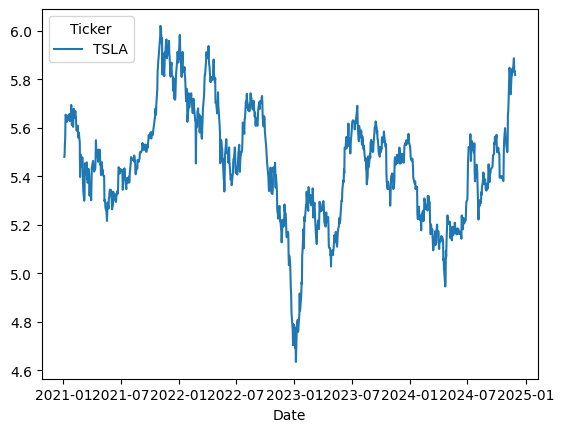

In [14]:
ticker_symbol = 'TSLA'
tesla_data = np.log(yf.download(ticker_symbol, start='2021-01-01', end='2024-12-01'))
teslaopen = pd.DataFrame(tesla_data['Open'])
sns.lineplot(teslaopen)

[*********************100%***********************]  1 of 1 completed


Bitcoin Data:


<Axes: xlabel='Date'>

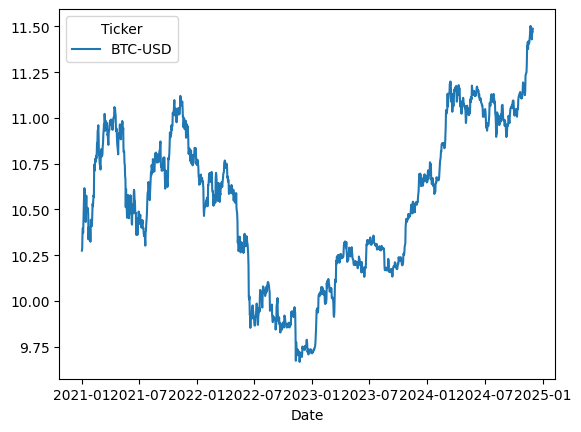

In [15]:
bitcoin_symbol = 'BTC-USD'

bitcoin_data = np.log(yf.download(bitcoin_symbol, start='2021-01-01', end='2024-12-01'))
print("Bitcoin Data:")
bitcoinopen = pd.DataFrame(bitcoin_data['Open'])
sns.lineplot(bitcoinopen)

[*********************100%***********************]  1 of 1 completed



Dogecoin Data:


<Axes: xlabel='Date'>

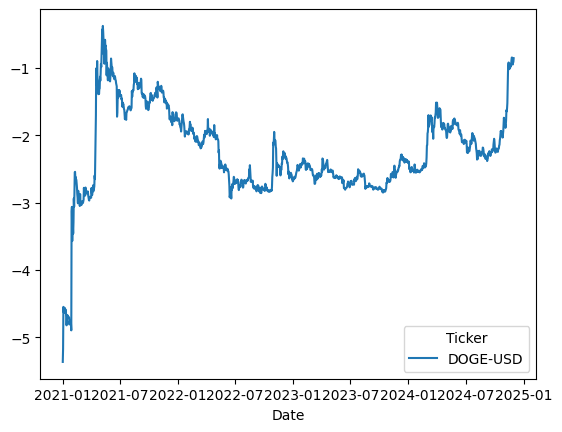

In [16]:
dogecoin_symbol = 'DOGE-USD'

dogecoin_data = np.log(yf.download(dogecoin_symbol, start='2021-01-01', end='2024-12-01'))
print("\nDogecoin Data:")
dogecoinopen = pd.DataFrame(dogecoin_data['Open'])
sns.lineplot(dogecoinopen)

In [17]:
#Descriptive Statistics
sumopen =  pd.concat([teslaopen, bitcoinopen, dogecoinopen], axis=1)
sumopen.describe()

Ticker,TSLA,BTC-USD,DOGE-USD
count,984.000000,1430.000000,1430.000000
mean,5.451132,10.542249,-2.243049
std,0.231943,0.428024,0.649608
min,4.634729,9.666644,-5.364244
25%,5.296804,10.209679,-2.651448
50%,5.459202,10.578561,-2.371601
75%,5.598761,10.941232,-1.837065
max,6.019736,11.502943,-0.374256


Decomposition of the Series
--

<Axes: title={'center': 'Residual'}, xlabel='Date'>

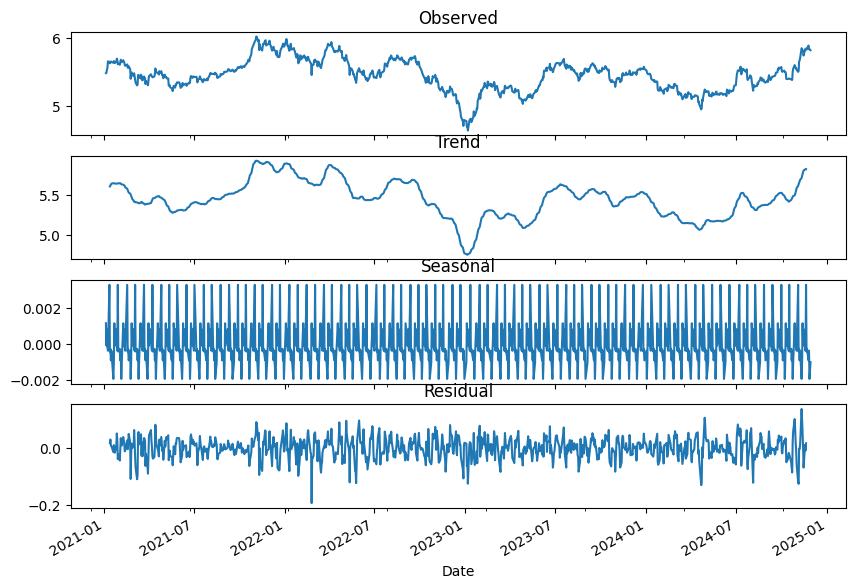

In [14]:
# decomposition of TESLA

result = seasonal_decompose(tesla_data['Open'], model='additive', period=12)

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True)
result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')


<Axes: title={'center': 'Residual'}, xlabel='Date'>

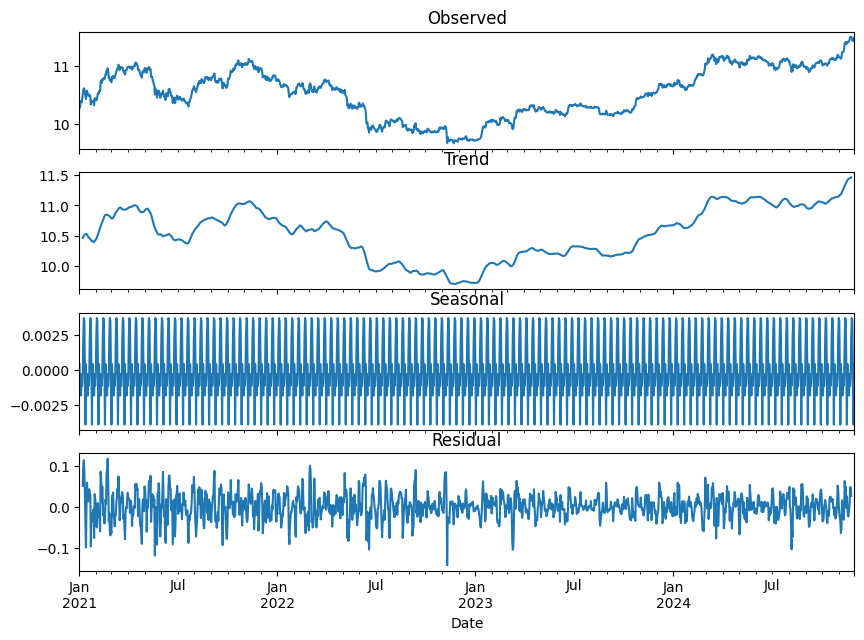

In [15]:
# decomposition of BITCOIN

result = seasonal_decompose(bitcoin_data['Open'], model='additive', period=12)

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True)
result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')


<Axes: title={'center': 'Residual'}, xlabel='Date'>

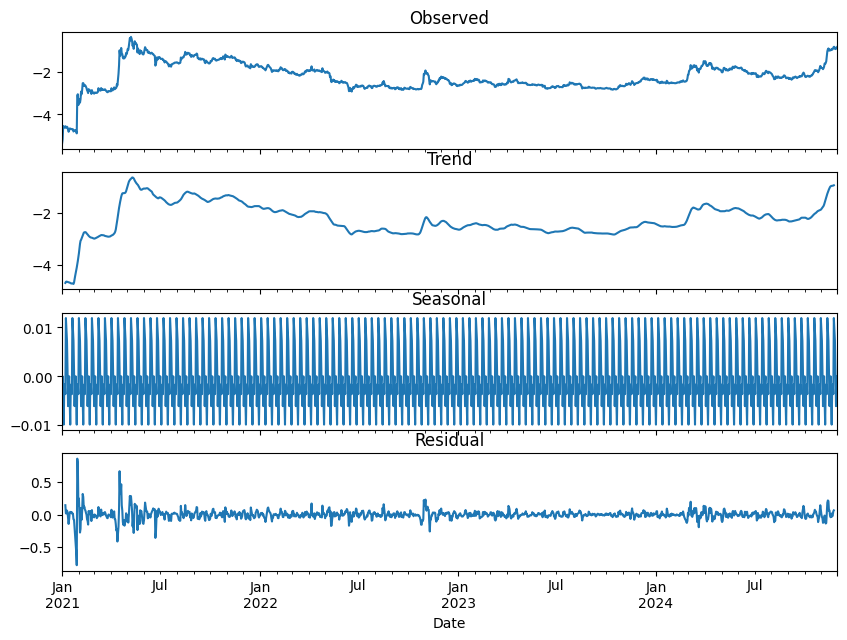

In [16]:
# decomposition of DOGECOIN

result = seasonal_decompose(dogecoin_data['Open'], model='additive', period=12)

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True)
result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')


ACF, PACF for the series
-

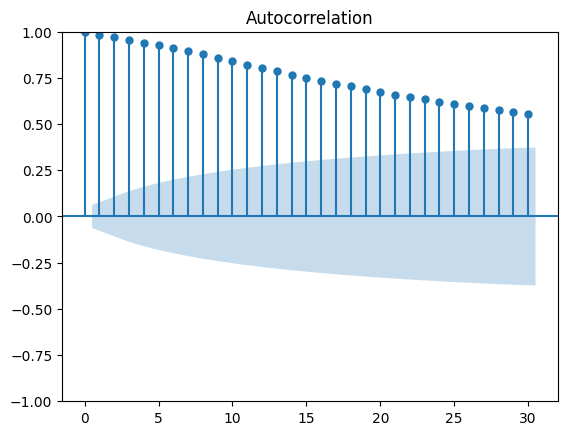

In [17]:
#TESLA ACF
plot_acf(tesla_data['Open'])
plt.show()

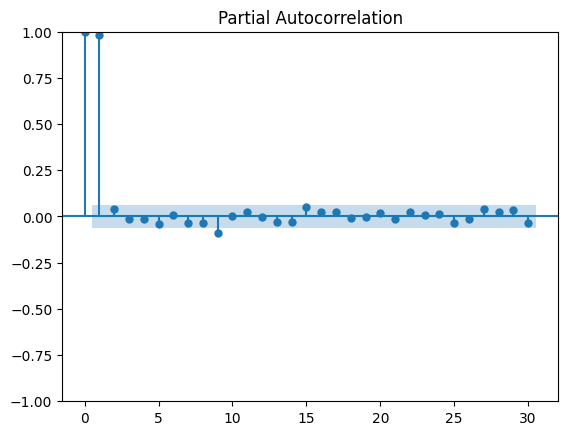

In [18]:
#TESLA PACF
plot_pacf(tesla_data['Open'])
plt.show()

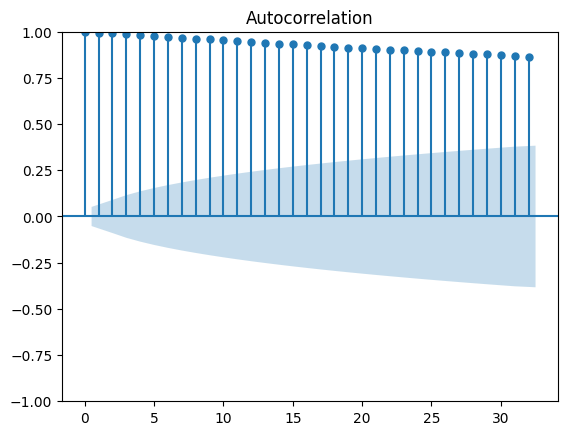

In [19]:
#BITCOIN ACF
plot_acf(bitcoin_data['Open'])
plt.show()

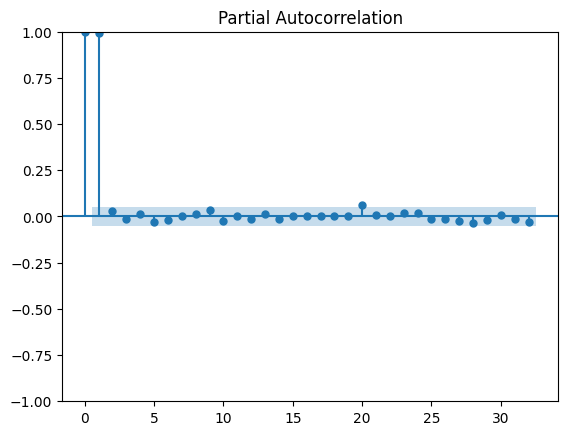

In [20]:
#BITCOIN PACF
plot_pacf(bitcoin_data['Open'])
plt.show()

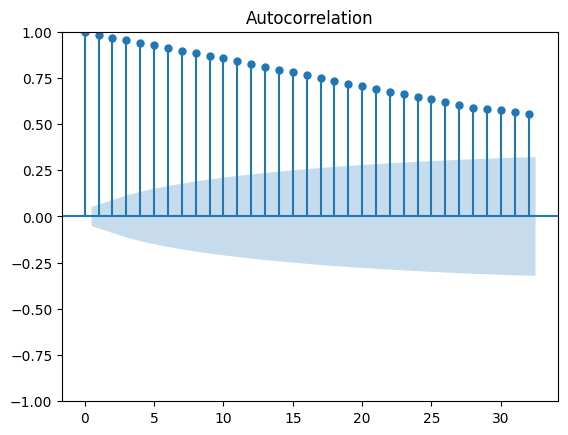

In [21]:
#DOGECOIN ACF
plot_acf(dogecoin_data['Open'])
plt.show()

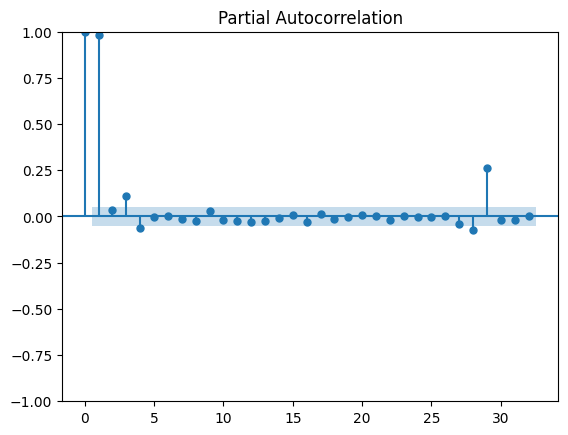

In [22]:
#DOGECOIN PACF
plot_pacf(dogecoin_data['Open'])
plt.show()

Testing for stationarity
-

In [23]:
#TESLA
test = adfuller(tesla_data['Open'], regression='n')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic 0.1873691377117303, P-value 0.7430436221985548


In [24]:
#TESLA
test = adfuller(tesla_data['Open'], regression='c')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic -2.9435245160375865, P-value 0.04051576203388273


We cannot reject the H0 that there is a unit root at 1%. Thus TESLA is non-stationary

In [25]:
#BITCOIN
test = adfuller(bitcoin_data['Open'], regression='n')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic 0.9813523512755233, P-value 0.913349012944817


In [26]:
#BITCOIN
test = adfuller(bitcoin_data['Open'], regression='c')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic -0.5814484063246245, P-value 0.8751190687852866


We cannot reject the H0 that there is a unit root. Thus BITCOIN is non-stationary

In [27]:
#DOGECOIN
test = adfuller(dogecoin_data['Open'], regression='n')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic -2.1447782956044605, P-value 0.03067790695920561


In [28]:
#DOGECOIN
test = adfuller(dogecoin_data['Open'], regression='c')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic -3.844917309871819, P-value 0.0024797754270485485


We fail to reject the H0 that there is a unit root at 1% sign. level. Thus DOGECOIN is stationary

In [29]:
#First Order Differences of series TESLA, BITCOIN, DOGECOIN
tesla_diff = tesla_data['Open'].diff()
bitcoin_diff = bitcoin_data['Open'].diff()
dogecoin_diff = dogecoin_data['Open'].diff()

In [30]:
#tesla_diff
test = adfuller(tesla_diff.dropna(), regression='n')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic -33.047376356666895, P-value 0.0


In [31]:
#tesla_diff
test = adfuller(tesla_diff.dropna(), regression='c')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic -33.033107767201614, P-value 0.0


We reject the H0 that there is a unit root at 1% sign. level. Thus tesla_diff is stationary

In [32]:
#bitcoin_diff
test = adfuller(bitcoin_diff.dropna(), regression='n')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic -39.11936783781475, P-value 0.0


In [33]:
#bitcoin_diff
test = adfuller(bitcoin_diff.dropna(), regression='c')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic -39.132450719966805, P-value 0.0


We reject the H0 that there is a unit root at 1% sign. level. Thus bitcoin_diff is stationary

In [34]:
#dogecoin_diff
test = adfuller(dogecoin_diff.dropna(), regression='n')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic -9.08215335191496, P-value 1.1221523493875336e-15


In [35]:
#dogecoin_diff
test = adfuller(dogecoin_diff.dropna(), regression='c')
print(f'ADF statistic {test[0]}, P-value {test[1]}')

ADF statistic -9.162198306044473, P-value 2.515477467409646e-15


We reject the H0 that there is a unit root at 1% sign. level. Thus dogecoin_diff is stationary

Train test split
-

In [18]:
#train test split for TESLA
split_index = int(len(tesla_data) * (0.8))

# Split the data
train_tesla = tesla_data[:split_index]
test_tesla = tesla_data[split_index:]

print(f"Training data length: {len(train_tesla)}")
print(f"Testing data length: {len(test_tesla)}")

Training data length: 787
Testing data length: 197


In [19]:
#train test split for BITCOIN
split_index = int(len(bitcoin_data) * (0.8))

# Split the data
train_bitcoin = bitcoin_data[:split_index]
test_bitcoin = bitcoin_data[split_index:]

print(f"Training data length: {len(train_bitcoin)}")
print(f"Testing data length: {len(test_bitcoin)}")

Training data length: 1144
Testing data length: 286


In [20]:
#train test split for DOGECOIN
split_index = int(len(dogecoin_data) * (0.8))

# Split the data
train_dogecoin = dogecoin_data[:split_index]
test_dogecoin = dogecoin_data[split_index:]

print(f"Training data length: {len(train_dogecoin)}")
print(f"Testing data length: {len(test_dogecoin)}")

Training data length: 1144
Testing data length: 286


Choosing ARIMA
-

Since TESLA and BITCOIN are non-stationary at levels but stationary at first differences, we fix d=1 for each

Since DOGECOIN is stationary, we fix d=0

In [39]:
#Tesla
aic_coeffs = None
bic_coeffs = None
best_aic = np.inf
best_bic = np.inf

for p in range(0, 10):
    for q in range(0, 10):
        model = ARIMA(endog=train_tesla['Open'], order=(p, 1, q)).fit(cov_type="robust")
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeffs = (p, q)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p, q)

print(f"best aic p, q = {aic_coeffs}, best bic p, q = {bic_coeffs}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


best aic p, q = (0, 8), best bic p, q = (0, 0)


In [40]:
#Bitcoin
aic_coeffs = None
bic_coeffs = None
best_aic = np.inf
best_bic = np.inf

for p in range(0, 10):
    for q in range(0, 10):
        model = ARIMA(endog=train_bitcoin['Open'], order=(p, 1, q)).fit(cov_type="robust")
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeffs = (p, q)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p, q)

print(f"best aic p, q = {aic_coeffs}, best bic p, q = {bic_coeffs}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

best aic p, q = (0, 0), best bic p, q = (0, 0)


In [41]:
#Dogecoin
aic_coeffs = None
bic_coeffs = None
best_aic = np.inf
best_bic = np.inf

for p in range(0, 10):
    for q in range(0, 10):
        model = ARIMA(endog=train_dogecoin['Open'], order=(p, 0, q)).fit(cov_type="robust")
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeffs = (p, q)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p, q)

print(f"best aic p, q = {aic_coeffs}, best bic p, q = {bic_coeffs}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

best aic p, q = (4, 5), best bic p, q = (4, 0)


Fitting ARIMA


In [21]:
ARIMA_tesla = ARIMA(endog=train_tesla['Open'], order=(0, 1, 8)).fit(cov_type="robust")
ARIMA_tesla.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TSLA   No. Observations:                  787
Model:                 ARIMA(0, 1, 8)   Log Likelihood                1443.898
Date:                Wed, 18 Dec 2024   AIC                          -2869.797
Time:                        15:38:27   BIC                          -2827.794
Sample:                             0   HQIC                         -2853.648
                                - 787                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0720      0.041     -1.774      0.076      -0.152       0.008
ma.L2          0.0127      0.040      0.321      0.748      -0.065       0.090
ma.L3         -0.0361      0.036     -1.014      0.311      -0.106       0.034
ma.L4          0.0842      0.036      2.328      0.020       0.013       0.155
ma.L5         -0.0088      0.037     -0.235      0.814      -0.082       0.064
ma.L6          0.0614      0.038      1.620      0.105      -0.013       0.136
ma.L7          0.0640      0.039      1.624      0.104      -0.013       0.141
ma.L8          0.0876      0.040      2.162      0.031       0.008       0.167
sigma2         0.0015   9.61e-05     15.457      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                55.99
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.12
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

In [43]:
#HO: There is no autocorr in residuals
acorr_ljungbox(
    x=ARIMA_tesla.resid,
    lags=min(ARIMA_tesla.resid.shape[0]/5, 10)
)

,lb_stat,lb_pvalue
1,0.000853,0.976695
2,0.053686,0.973514
3,0.071406,0.995033
4,0.298681,0.989899
5,0.298694,0.997668
6,0.317957,0.999405
7,0.333993,0.999856
8,0.344345,0.999968
9,0.344918,0.999994
10,0.377664,0.999998


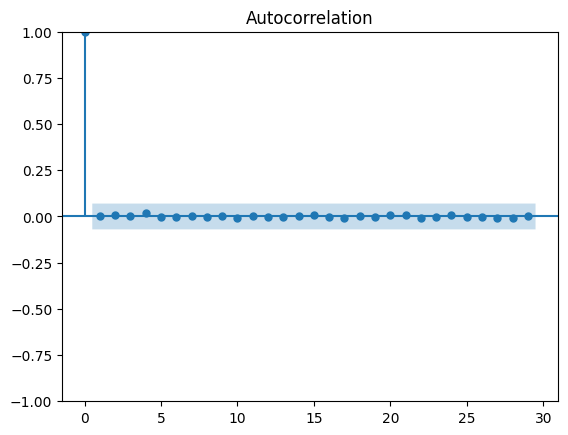

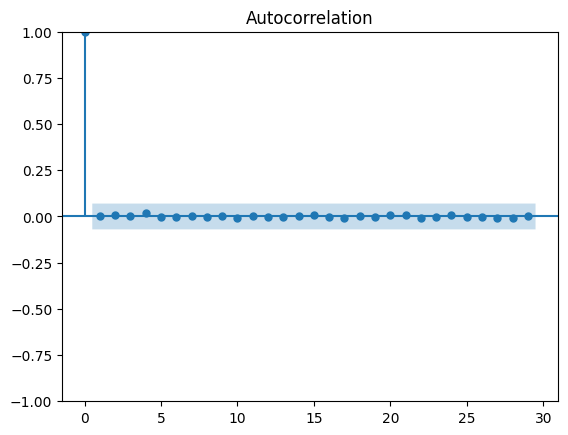

In [44]:
#TESLA ARIMA resids ACF-PACF
plot_acf(ARIMA_tesla.resid)
plt.show()
plot_acf(ARIMA_tesla.resid)
plt.show()

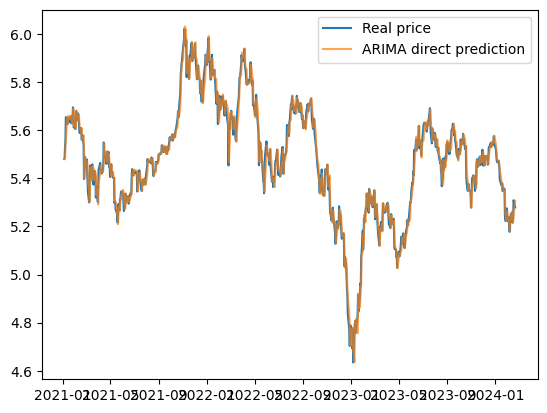

In [45]:
#In-sample fit for TESLA
tesla_predict = ARIMA_tesla.predict(
    start=np.min(train_tesla.tail(-1).index),
    end=np.max(train_tesla.index),
    dynamic=False,
    information_set="predicted"
)
plt.plot(train_tesla['Open'], label="Real price")
plt.plot(tesla_predict, label="ARIMA direct prediction",alpha=0.7
)
plt.legend()

In [46]:
ARIMA_bitcoin = ARIMA(endog=train_bitcoin['Open'], order=(0, 1, 0)).fit(cov_type="robust")
ARIMA_bitcoin.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                BTC-USD   No. Observations:                 1144
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2257.002
Date:                Wed, 18 Dec 2024   AIC                          -4512.004
Time:                        12:08:03   BIC                          -4506.963
Sample:                    01-01-2021   HQIC                         -4510.101
                         - 02-18-2024                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   7.91e-05     14.267      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):               635.36
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.63
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

In [47]:
#HO: There is no autocorr in residuals
acorr_ljungbox(
    x=ARIMA_bitcoin.resid,
    lags=min(ARIMA_bitcoin.resid.shape[0]/5, 10)
)

,lb_stat,lb_pvalue
1,0.000777,0.977760
2,0.091229,0.955410
3,0.096683,0.992232
4,0.101818,0.998747
5,0.141935,0.999616
6,0.214434,0.999810
7,0.255392,0.999942
8,0.264181,0.999989
9,0.264339,0.999998
10,0.291538,1.000000


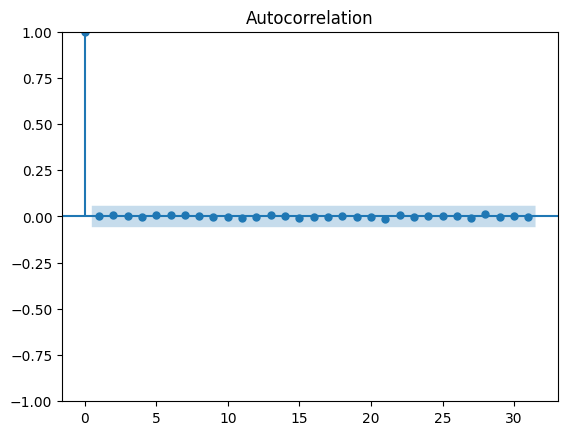

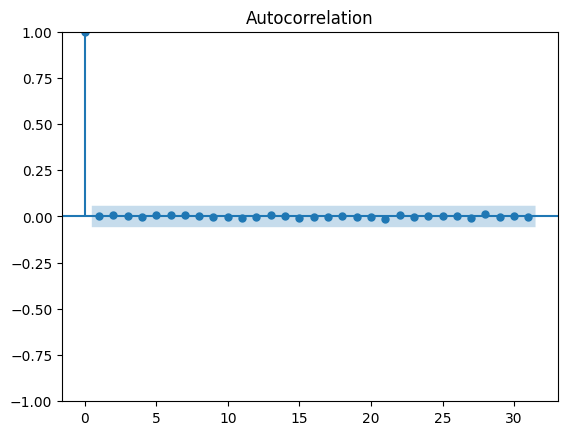

In [48]:
#BITCOIN ARIMA resids ACF-PACF
plot_acf(ARIMA_bitcoin.resid)
plt.show()
plot_acf(ARIMA_bitcoin.resid)
plt.show()

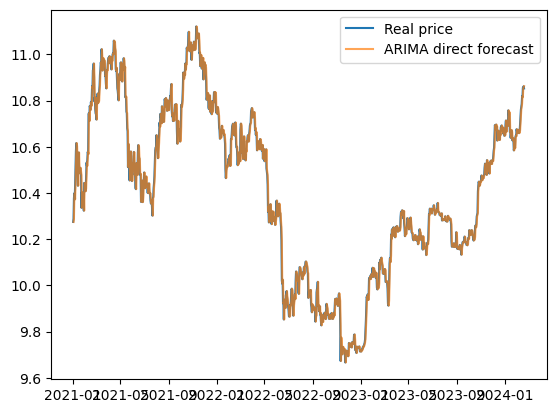

In [49]:
#In-sample fit for BITCOIN
bitcoin_predict = ARIMA_bitcoin.predict(
    start=np.min(train_bitcoin.tail(-1).index),
    end=np.max(train_bitcoin.index),
    dynamic=False,
    information_set="predicted"
)
plt.plot(train_bitcoin['Open'], label="Real price")
plt.plot(bitcoin_predict, label="ARIMA direct forecast",alpha=0.7)
plt.legend()

In [50]:
ARIMA_dogecoin = ARIMA(endog=train_dogecoin['Open'], order=(4, 0, 5)).fit(cov_type="robust")
ARIMA_dogecoin.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               DOGE-USD   No. Observations:                 1144
Model:                 ARIMA(4, 0, 5)   Log Likelihood                1186.238
Date:                Wed, 18 Dec 2024   AIC                          -2350.476
Time:                        12:08:11   BIC                          -2295.010
Sample:                    01-01-2021   HQIC                         -2329.533
                         - 02-18-2024                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4267      2.683     -0.904      0.366      -7.686       2.833
ar.L1         -0.8961      0.103     -8.723      0.000      -1.097      -0.695
ar.L2          0.1444      0.072      1.999      0.046       0.003       0.286
ar.L3          0.9850      0.080     12.277      0.000       0.828       1.142
ar.L4          0.7646      0.095      8.034      0.000       0.578       0.951
ma.L1          1.8723      0.095     19.784      0.000       1.687       2.058
ma.L2          1.6539      0.188      8.797      0.000       1.285       2.022
ma.L3          0.7213      0.220      3.280      0.001       0.290       1.152
ma.L4          0.0758      0.186      0.407      0.684      -0.289       0.441
ma.L5          0.0856      0.077      1.107      0.268      -0.066       0.237
sigma2         0.0073      0.003      2.598      0.009       0.002       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1333596.13
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             8.52
Prob(H) (two-sided):                  0.00   Kurtosis:                       169.39
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

In [51]:
#HO: There is no autocorr in residuals
acorr_ljungbox(
    x=ARIMA_dogecoin.resid.tail(-1),
    lags=min(ARIMA_dogecoin.resid.shape[0]/5, 10)
)

,lb_stat,lb_pvalue
1,0.002887,0.957151
2,0.021097,0.989507
3,0.376760,0.945000
4,0.390404,0.983255
5,0.392869,0.995524
6,0.426798,0.998619
7,0.823389,0.997198
8,0.872601,0.998932
9,1.537676,0.996857
10,6.671991,0.756006


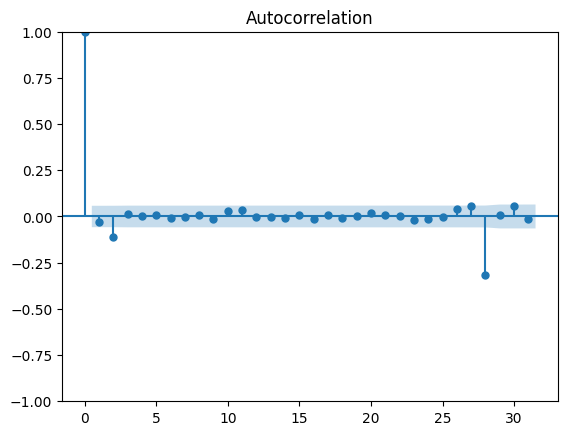

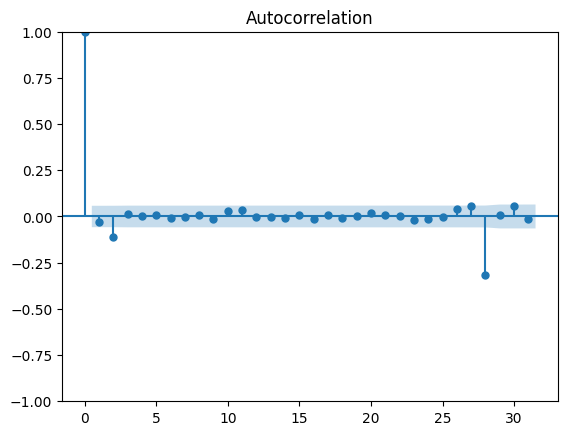

In [52]:
#DOGECOIN ARIMA resids ACF-PACF
plot_acf(ARIMA_dogecoin.resid)
plt.show()
plot_acf(ARIMA_dogecoin.resid)
plt.show()

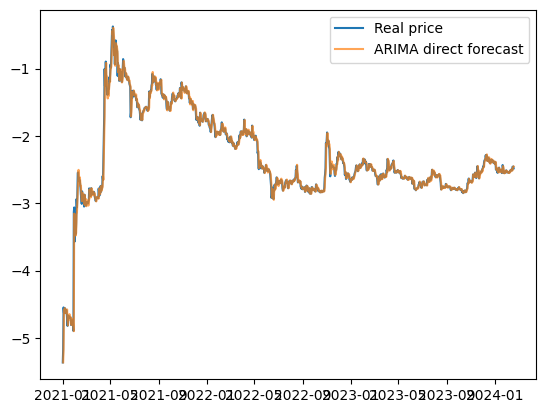

In [53]:
#In-sample fit for DOGECOIN
dogecoin_predict = ARIMA_dogecoin.predict(
    start=np.min(train_dogecoin.tail(-1).index),
    end=np.max(train_dogecoin.index),
    dynamic=False,
    information_set="predicted"
)
plt.plot(train_dogecoin['Open'], label="Real price")
plt.plot(dogecoin_predict, label="ARIMA direct forecast",alpha=0.7
)
plt.legend()

ARIMA residuals resemble white noise

GARCH
-

In [54]:
#GARCH for TESLA
train_tesla_diff = train_tesla['Open'].diff()

acorr_ljungbox(
    x=train_tesla_diff.dropna()**2,
    lags=min(train_tesla_diff.dropna().shape[0]/5, 10)
)

,lb_stat,lb_pvalue
1,14.286132,0.000157
2,16.299629,0.000289
3,17.402042,0.000584
4,17.586907,0.001486
5,18.895440,0.002010
6,20.440633,0.002311
7,25.185761,0.000703
8,33.083599,0.000059
9,34.493607,0.000073
10,37.676636,0.000043


$H_{0}$: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process).

$H_{1}$: The data are not independently distributed; they exhibit serial correlation.

In [55]:
#best (p,q) for garch TESLA
aic_coeffs = None
bic_coeffs = None
best_aic = np.inf
best_bic = np.inf

for p in range(1, 5):
    for q in range(1, 5):
        model = arch_model(y=train_tesla_diff.dropna(), vol='GARCH', p=p, q=q, dist='normal',).fit()
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeffs = (p, q)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p, q)

print(f"best aic p, q = {aic_coeffs}, best bic p, q = {bic_coeffs}")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 19107588.63572011
Iteration:      2,   Func. Count:     17,   Neg. LLF: -968.3813937708113
Iteration:      3,   Func. Count:     25,   Neg. LLF: -523.5230071781994
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1431.9197739694239
Iteration:      5,   Func. Count:     42,   Neg. LLF: -1441.6738995535864
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1445.864900861629
Iteration:      7,   Func. Count:     58,   Neg. LLF: -1457.2888584700954
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1457.2888697759813
            Iterations: 7
            Function evaluations: 68
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      7,   Neg. LLF: 144976273288.6326
Iteration:      2,   Func. Count:     19,   Neg. LLF: 85444265.42110434
Iteration:      3,   Func. Count:     32,   Neg. LLF: 285696.75627288065
Iteration:      4,   Func. Count:     43,   Neg. LLF: -466.35

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:


Iteration:      9,   Func. Count:     73,   Neg. LLF: -1457.2869010424283
Iteration:     10,   Func. Count:     79,   Neg. LLF: -1457.2885896826974
Iteration:     11,   Func. Count:     85,   Neg. LLF: -1457.2888527655236
Iteration:     12,   Func. Count:     91,   Neg. LLF: -1457.2888590615044
Iteration:     13,   Func. Count:     96,   Neg. LLF: -1457.2888590606847
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1457.2888590615044
            Iterations: 13
            Function evaluations: 96
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      8,   Neg. LLF: 39261304330.07374
Iteration:      2,   Func. Count:     21,   Neg. LLF: 3563.287082230642
Iteration:      3,   Func. Count:     32,   Neg. LLF: 16463.988936365462
Iteration:      4,   Func. Count:     44,   Neg. LLF: 826.5628907129443
Iteration:      5,   Func. Count:     55,   Neg. LLF: -1417.3289220590218
Iteration:      6,   Func. Count:     65,   Neg. LLF: -

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     12,   Func. Count:    147,   Neg. LLF: -1410.584509039606
Iteration:     13,   Func. Count:    158,   Neg. LLF: -978.4509371912129
Iteration:     14,   Func. Count:    168,   Neg. LLF: -1448.9942269993253
Iteration:     15,   Func. Count:    177,   Neg. LLF: -1452.9701420633874
Iteration:     16,   Func. Count:    186,   Neg. LLF: -1457.555276001331
Iteration:     17,   Func. Count:    195,   Neg. LLF: -1457.7043476335516
Iteration:     18,   Func. Count:    204,   Neg. LLF: -1454.4362500633447
Iteration:     19,   Func. Count:    213,   Neg. LLF: -1458.5438534999485
Iteration:     20,   Func. Count:    221,   Neg. LLF: -1458.619723238232
Iteration:     21,   Func. Count:    229,   Neg. LLF: -1458.6315008135343
Iteration:     22,   Func. Count:    237,   Neg. LLF: -1458.6353319437271
Iteration:     23,   Func. Count:    245,   Neg. LLF: -1458.6361640402831
Iteration:     24,   Func. Count:    253,   Neg. LLF: -1458.6365814126802
Iteration:     25,   Func. Count:    261, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     19,   Func. Count:    188,   Neg. LLF: -1457.3317513341399
Iteration:     20,   Func. Count:    196,   Neg. LLF: -1457.3317589209005
Iteration:     21,   Func. Count:    203,   Neg. LLF: -1457.3317589204887
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1457.3317589209005
            Iterations: 21
            Function evaluations: 203
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     10,   Neg. LLF: 32070750.36232098
Iteration:      2,   Func. Count:     25,   Neg. LLF: 846583.4752690521
Iteration:      3,   Func. Count:     36,   Neg. LLF: 5353725.041791734
Iteration:      4,   Func. Count:     51,   Neg. LLF: -1347.1165588107879
Iteration:      5,   Func. Count:     64,   Neg. LLF: -1426.1833206235592
Iteration:      6,   Func. Count:     76,   Neg. LLF: -898.282165369448
Iteration:      7,   Func. Count:     87,   Neg. LLF: 4878749.0358765125
Iteration:      8,   Func. Count:     98,   Neg. LLF: -14

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      3,   Func. Count:     40,   Neg. LLF: 38131.85033016757
Iteration:      4,   Func. Count:     51,   Neg. LLF: 6941.269285140992
Iteration:      5,   Func. Count:     62,   Neg. LLF: -1255.5922226151997
Iteration:      6,   Func. Count:     74,   Neg. LLF: -1440.6973908704142
Iteration:      7,   Func. Count:     85,   Neg. LLF: -1441.7360448014051
Iteration:      8,   Func. Count:     96,   Neg. LLF: -757.9798913772779
Iteration:      9,   Func. Count:    108,   Neg. LLF: -726.181851268731
Iteration:     10,   Func. Count:    121,   Neg. LLF: 101352196.60499577
Iteration:     11,   Func. Count:    137,   Neg. LLF: 11115.686633813682
Iteration:     12,   Func. Count:    150,   Neg. LLF: 237.64017323079617
Iteration:     13,   Func. Count:    162,   Neg. LLF: -1432.5855926689753
Iteration:     14,   Func. Count:    174,   Neg. LLF: -711.6722939820711
Iteration:     15,   Func. Count:    186,   Neg. LLF: -1381.8966763395383
Iteration:     16,   Func. Count:    197,   Neg. 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      9,   Func. Count:    122,   Neg. LLF: 9153.243976437188
Iteration:     10,   Func. Count:    136,   Neg. LLF: 1501.8143530622797
Iteration:     11,   Func. Count:    149,   Neg. LLF: 3418.614632909465
Iteration:     12,   Func. Count:    162,   Neg. LLF: 12037382.44514916
Iteration:     13,   Func. Count:    174,   Neg. LLF: -1397.8327563720113
Iteration:     14,   Func. Count:    186,   Neg. LLF: -1016.4538930981157
Iteration:     15,   Func. Count:    197,   Neg. LLF: -1435.7819150800683
Iteration:     16,   Func. Count:    207,   Neg. LLF: -1448.1013490794555
Iteration:     17,   Func. Count:    217,   Neg. LLF: -1448.9406082608962
Iteration:     18,   Func. Count:    227,   Neg. LLF: -1457.9398942508387
Iteration:     19,   Func. Count:    236,   Neg. LLF: -1438.482663749221
Iteration:     20,   Func. Count:    246,   Neg. LLF: -1458.112008816449
Iteration:     21,   Func. Count:    255,   Neg. LLF: -1458.236621645633
Iteration:     22,   Func. Count:    264,   Neg.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     21,   Func. Count:    247,   Neg. LLF: -1458.8296621989898
Iteration:     22,   Func. Count:    257,   Neg. LLF: -1458.8296696253515
Iteration:     23,   Func. Count:    266,   Neg. LLF: -1458.8296696259763
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1458.8296696253515
            Iterations: 23
            Function evaluations: 266
            Gradient evaluations: 23
Iteration:      1,   Func. Count:     12,   Neg. LLF: 12752691.228003116
Iteration:      2,   Func. Count:     29,   Neg. LLF: 737.1032178722721
Iteration:      3,   Func. Count:     44,   Neg. LLF: 15444.434076490077
Iteration:      4,   Func. Count:     56,   Neg. LLF: -1374.3248203886064
Iteration:      5,   Func. Count:     68,   Neg. LLF: -1392.9982070050382
Iteration:      6,   Func. Count:     80,   Neg. LLF: -1420.1551507985778
Iteration:      7,   Func. Count:     93,   Neg. LLF: -1450.5842987530716
Iteration:      8,   Func. Count:    105,   Neg. LLF

In [56]:
garch_tesla = arch_model(
    y=train_tesla_diff.dropna(),
    vol='GARCH',
    p=1,
    q=1,
    dist='normal',
)
res=garch_tesla.fit()
res.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 19107588.63572011
Iteration:      2,   Func. Count:     17,   Neg. LLF: -968.3813937708113
Iteration:      3,   Func. Count:     25,   Neg. LLF: -523.5230071781994
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1431.9197739694239
Iteration:      5,   Func. Count:     42,   Neg. LLF: -1441.6738995535864
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1445.864900861629
Iteration:      7,   Func. Count:     58,   Neg. LLF: -1457.2888584700954
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1457.2888697759813
            Iterations: 7
            Function evaluations: 68
            Gradient evaluations: 7


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   TSLA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1457.29
Distribution:                  Normal   AIC:                          -2906.58
Method:            Maximum Likelihood   BIC:                          -2887.91
                                        No. Observations:                  786
Date:                Wed, Dec 18 2024   Df Residuals:                      785
Time:                        12:08:14   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.7861e-04  1.304e-03      0.137      0.891 [-2.377e-03,2.735e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.3076e-05  9.763e-06      3.388  7.045e-04 [1.394e-05,5.221e-05]
alpha[1]       0.0590  1.810e-02      3.260  1.116e-03 [2.353e-02,9.450e-02]
beta[1]        0.9204  1.486e-02     61.939      0.000     [  0.891,  0.949]
============================================================================

Covariance estimator: robust
"""

<Axes: xlabel='Date'>

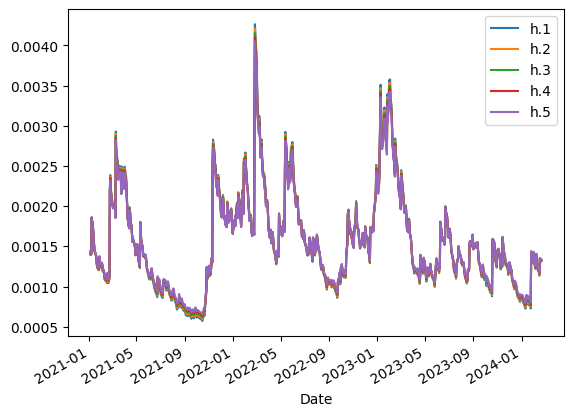

In [57]:
forecasts = res.forecast(horizon=5, start= np.min(train_tesla_diff.index))
forecasts.variance.plot()

In [58]:
#GARCH for BITCOIN
train_bitcoin_diff = train_bitcoin['Open'].diff()

acorr_ljungbox(
    x=train_bitcoin_diff.dropna()**2,
    lags=min(train_bitcoin_diff.dropna().shape[0]/5, 10)
)

,lb_stat,lb_pvalue
1,12.665843,3.723967e-04
2,15.104051,5.250454e-04
3,17.358857,5.962371e-04
4,28.640472,9.248388e-06
5,34.477414,1.912761e-06
6,40.355120,3.878699e-07
7,52.722897,4.204741e-09
8,56.620167,2.135676e-09
9,61.034411,8.468156e-10
10,61.235471,2.114025e-09


In [59]:
#best (p,q) for garch BITCOIN
aic_coeffs = None
bic_coeffs = None
best_aic = np.inf
best_bic = np.inf

for p in range(1, 5):
    for q in range(1, 5):
        model = arch_model(y=train_bitcoin_diff.dropna(), vol='GARCH', p=p, q=q, dist='normal',).fit()
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeffs = (p, q)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p, q)

print(f"best aic p, q = {aic_coeffs}, best bic p, q = {bic_coeffs}")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14247053.85277751
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4.686835535959755e+16
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2227687.161216948
Iteration:      4,   Func. Count:     40,   Neg. LLF: 271644187726288.12
Iteration:      5,   Func. Count:     50,   Neg. LLF: -2325.1081876710577
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2325.1081908338174
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9960714.880195837
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4700548.950557122
Iteration:      3,   Func. Count:     32,   Neg. LLF: 369339565429141.9
Iteration:      4,   Func. Count:     44,   Neg. LLF: -2326.5697297309803
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2326.569736406352
            Iterations: 8

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      7,   Func. Count:     95,   Neg. LLF: -506.81034149164896
Iteration:      8,   Func. Count:    108,   Neg. LLF: 432048.4728698086
Iteration:      9,   Func. Count:    122,   Neg. LLF: -2188.557515992704
Iteration:     10,   Func. Count:    134,   Neg. LLF: -1880.2733702129171
Iteration:     11,   Func. Count:    145,   Neg. LLF: -2131.9436779321018
Iteration:     12,   Func. Count:    156,   Neg. LLF: -2305.7864400593708
Iteration:     13,   Func. Count:    166,   Neg. LLF: -2305.1805239619653
Iteration:     14,   Func. Count:    176,   Neg. LLF: -2304.91464397007
Iteration:     15,   Func. Count:    186,   Neg. LLF: -2227.856493963222
Iteration:     16,   Func. Count:    196,   Neg. LLF: -2313.944192245408
Iteration:     17,   Func. Count:    206,   Neg. LLF: -2337.429086391296
Iteration:     18,   Func. Count:    215,   Neg. LLF: -2336.9841494169996
Iteration:     19,   Func. Count:    225,   Neg. LLF: -2331.849072928866
Iteration:     20,   Func. Count:    235,   Neg

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      3,   Func. Count:     44,   Neg. LLF: 265953538892990.97
Iteration:      4,   Func. Count:     60,   Neg. LLF: -2322.0377131255555
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2322.037722173269
            Iterations: 8
            Function evaluations: 60
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      9,   Neg. LLF: 6042342.395256638
Iteration:      2,   Func. Count:     23,   Neg. LLF: 42.76528447193634
Iteration:      3,   Func. Count:     34,   Neg. LLF: 6000.959100597259
Iteration:      4,   Func. Count:     44,   Neg. LLF: 55374.35942192593
Iteration:      5,   Func. Count:     57,   Neg. LLF: 3023.5953339639505
Iteration:      6,   Func. Count:     69,   Neg. LLF: 6341.725215342009
Iteration:      7,   Func. Count:     82,   Neg. LLF: 6751170509.763534
Iteration:      8,   Func. Count:     93,   Neg. LLF: -2131.15399874411
Iteration:      9,   Func. Count:    104,   Neg. LLF: -1967.47070759

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

In [60]:
garch_bitcoin = arch_model(
    y=train_bitcoin_diff.dropna(),
    vol='GARCH',
    p=1,
    q=4,
    dist='normal',
)
res=garch_bitcoin.fit()
res.summary()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      9,   Neg. LLF: 123230296.26874357
Iteration:      2,   Func. Count:     23,   Neg. LLF: 152218676897.08957
Iteration:      3,   Func. Count:     37,   Neg. LLF: -1104.303415080219
Iteration:      4,   Func. Count:     50,   Neg. LLF: 518088.10089783726
Iteration:      5,   Func. Count:     62,   Neg. LLF: -2138.1849316209077
Iteration:      6,   Func. Count:     73,   Neg. LLF: 320.020023918784
Iteration:      7,   Func. Count:     82,   Neg. LLF: -2241.327730959506
Iteration:      8,   Func. Count:     91,   Neg. LLF: -2303.9107088391324
Iteration:      9,   Func. Count:    100,   Neg. LLF: -2308.3373466024013
Iteration:     10,   Func. Count:    109,   Neg. LLF: -2309.1190964984658
Iteration:     11,   Func. Count:    118,   Neg. LLF: -2299.914061925336
Iteration:     12,   Func. Count:    127,   Neg. LLF: -2307.3191628438035
Iteration:     13,   Func. Count:    136,   Neg. LLF: -2338.56408635143
Iteration:     14,   Func. Count:    144,   Neg. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                BTC-USD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2339.76
Distribution:                  Normal   AIC:                          -4665.52
Method:            Maximum Likelihood   BIC:                          -4630.23
                                        No. Observations:                 1143
Date:                Wed, Dec 18 2024   Df Residuals:                     1142
Time:                        12:08:16   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.4027e-04  8.370e-04      1.004      0.315 [-8.003e-04,2.481e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.1245e-05  6.052e-06      3.510  4.474e-04 [9.383e-06,3.311e-05]
alpha[1]       0.0906  5.174e-02      1.751  8.000e-02  [-1.083e-02,  0.192]
beta[1]    9.4717e-15      0.258  3.673e-14      1.000     [ -0.505,  0.505]
beta[2]    7.8492e-15      0.295  2.659e-14      1.000     [ -0.579,  0.579]
beta[3]        0.6495      0.125      5.184  2.173e-07     [  0.404,  0.895]
beta[4]        0.2358      0.415      0.568      0.570     [ -0.578,  1.050]
============================================================================

Covariance estimator: robust
"""

<Axes: xlabel='Date'>

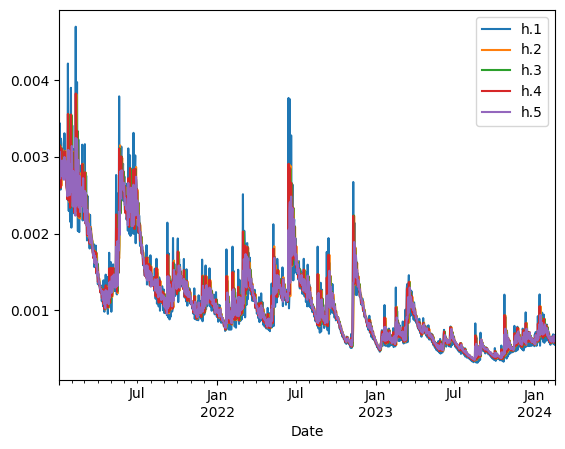

In [61]:
forecasts = res.forecast(horizon=5, start= np.min(train_bitcoin_diff.index))
forecasts.variance.plot()

In [62]:
#GARCH for DOGECOIN
#DOGECOIN is stationary, garch is fitted at levels
acorr_ljungbox(
    x=train_dogecoin['Open'].dropna()**2,
    lags=min(train_dogecoin['Open'].dropna().shape[0]/5, 10)
)

,lb_stat,lb_pvalue
1,1077.371233,2.736305e-236
2,2096.733792,0.000000e+00
3,3087.655335,0.000000e+00
4,4042.387941,0.000000e+00
5,4961.315956,0.000000e+00
6,5848.295717,0.000000e+00
7,6701.738394,0.000000e+00
8,7518.416869,0.000000e+00
9,8302.731792,0.000000e+00
10,9054.519180,0.000000e+00


In [63]:
#best (p,q) for garch DOGECOIN
aic_coeffs = None
bic_coeffs = None
best_aic = np.inf
best_bic = np.inf

for p in range(1, 5):
    for q in range(1, 5):
        model = arch_model(y=train_dogecoin['Open'].dropna(), vol='GARCH', p=p, q=q, dist='normal',).fit()
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeffs = (p, q)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p, q)

print(f"best aic p, q = {aic_coeffs}, best bic p, q = {bic_coeffs}")

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3919926025.289728
Iteration:      2,   Func. Count:     18,   Neg. LLF: 704145.7529953715
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2502947.3734885496
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2010.3133500638037
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2253.8748182146824
Iteration:      6,   Func. Count:     45,   Neg. LLF: 273.1170906355647
Iteration:      7,   Func. Count:     51,   Neg. LLF: 180.21532322827875
Iteration:      8,   Func. Count:     56,   Neg. LLF: 185.77603710681876
Iteration:      9,   Func. Count:     62,   Neg. LLF: 21366.814005560576
Iteration:     10,   Func. Count:     68,   Neg. LLF: 397.8851141105109
Iteration:     11,   Func. Count:     74,   Neg. LLF: 160.75397598187078
Iteration:     12,   Func. Count:     80,   Neg. LLF: 250.3863020405933
Iteration:     13,   Func. Count:     87,   Neg. LLF: 183.61001051330652
Iteration:     14,   Func. Count:     93,   Neg. LLF: 14

In [64]:
garch_dogecoin = arch_model(
    y=train_dogecoin['Open'].dropna(),
    vol='GARCH',
    p=1,
    q=2,
    dist='normal',
)
res=garch_dogecoin.fit()
res.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3257832778.717723
Iteration:      2,   Func. Count:     20,   Neg. LLF: 371436.59051916393
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2158229.8993858686
Iteration:      4,   Func. Count:     36,   Neg. LLF: 289.4294419363965
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2141.376743135023
Iteration:      6,   Func. Count:     52,   Neg. LLF: 804.0759204447363
Iteration:      7,   Func. Count:     59,   Neg. LLF: 365.60092595001163
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1428.4678328187033
Iteration:      9,   Func. Count:     75,   Neg. LLF: 83395.02100418217
Iteration:     10,   Func. Count:     88,   Neg. LLF: 2036.9579262911147
Iteration:     11,   Func. Count:     96,   Neg. LLF: 323.1922750310879
Iteration:     12,   Func. Count:    103,   Neg. LLF: 259.7956487720228
Iteration:     13,   Func. Count:    110,   Neg. LLF: 302.4856673494951
Iteration:     14,   Func. Count:    117,   Neg. LLF: 193.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               DOGE-USD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -138.167
Distribution:                  Normal   AIC:                           286.334
Method:            Maximum Likelihood   BIC:                           311.546
                                        No. Observations:                 1144
Date:                Wed, Dec 18 2024   Df Residuals:                     1143
Time:                        12:08:18   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -2.5989  1.028e-02   -252.916      0.000 [ -2.619, -2.579]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.3732e-04  3.127e-04      2.997  2.722e-03 [3.244e-04,1.550e-03]
alpha[1]       0.8834  8.293e-02     10.652  1.711e-26     [  0.721,  1.046]
beta[1]        0.0380  9.767e-02      0.389      0.697     [ -0.153,  0.229]
beta[2]        0.0786  4.074e-02      1.929  5.372e-02  [-1.259e-03,  0.158]
============================================================================

Covariance estimator: robust
"""

<Axes: xlabel='Date'>

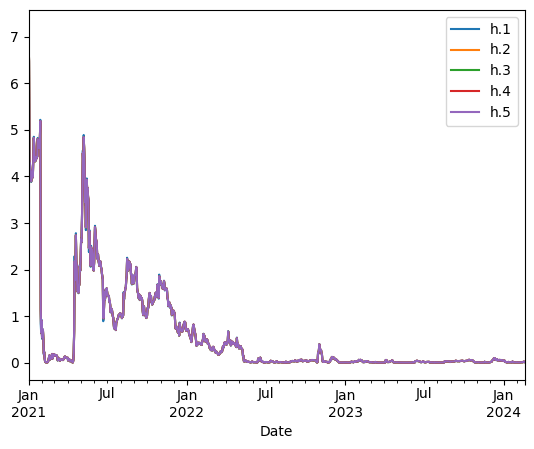

In [65]:
forecasts = res.forecast(horizon=5, start= np.min(train_dogecoin.index))
forecasts.variance.plot()


ARIMA-GARCH
-

I choose to fit an ARMA model first and then fit a GARCH model on the ARIMA residuals, but this is not the preferred way. ARMA estimates will generally be inconsistent (In a special case where there are only AR terms and no MA terms, the estimates will be consistent but inefficient). This will also contaminate the GARCH estimates. Therefore the preferred way is to estimate both ARMA and GARCH models simultaneously. However, this is not possible in Python.

In [66]:
#best (p,q) for arimagarch TESLA
aic_coeffs = None
bic_coeffs = None
best_aic = np.inf
best_bic = np.inf

for p in range(1, 5):
    for q in range(1, 5):
        model = arch_model(y=ARIMA_tesla.resid.tail(-1), vol='GARCH', p=p, q=q, dist='normal',).fit()
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeffs = (p, q)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p, q)

print(f"best aic p, q = {aic_coeffs}, best bic p, q = {bic_coeffs}")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1115877.643870364
Iteration:      2,   Func. Count:     17,   Neg. LLF: -392.2683919253934
Iteration:      3,   Func. Count:     27,   Neg. LLF: -877.8660032337172
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1462.325970485948
Iteration:      5,   Func. Count:     41,   Neg. LLF: -1465.5480176981132
Iteration:      6,   Func. Count:     46,   Neg. LLF: -1465.5480483301535
Iteration:      7,   Func. Count:     52,   Neg. LLF: -1465.5481340757995
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1465.5481499735702
            Iterations: 7
            Function evaluations: 62
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3097340063353473.0
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1463.5036462761032
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1463.503648065096
            Iterations

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      1,   Func. Count:      8,   Neg. LLF: 38981294907.84687
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1617.0295253135441
Iteration:      3,   Func. Count:     32,   Neg. LLF: 11888.689073302226
Iteration:      4,   Func. Count:     43,   Neg. LLF: -1419.2863129574537
Iteration:      5,   Func. Count:     53,   Neg. LLF: -1333.695049614139
Iteration:      6,   Func. Count:     61,   Neg. LLF: -1445.2331021960358
Iteration:      7,   Func. Count:     69,   Neg. LLF: -1460.416557061917
Iteration:      8,   Func. Count:     77,   Neg. LLF: -1465.2368139878852
Iteration:      9,   Func. Count:     85,   Neg. LLF: -1465.7092924360513
Iteration:     10,   Func. Count:     93,   Neg. LLF: -1466.5288742567386
Iteration:     11,   Func. Count:    100,   Neg. LLF: -1466.4087188840679
Iteration:     12,   Func. Count:    108,   Neg. LLF: -1466.3733012317548
Iteration:     13,   Func. Count:    116,   Neg. LLF: -1466.7715177865348
Iteration:     14,   Func. Count:    123,   

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      6,   Func. Count:     79,   Neg. LLF: -883.5281418725112
Iteration:      7,   Func. Count:     91,   Neg. LLF: -1422.2476607787607
Iteration:      8,   Func. Count:    102,   Neg. LLF: -1451.5528847912478
Iteration:      9,   Func. Count:    113,   Neg. LLF: -1454.334343212982
Iteration:     10,   Func. Count:    124,   Neg. LLF: -1462.9783254117024
Iteration:     11,   Func. Count:    135,   Neg. LLF: -1456.5399798581166
Iteration:     12,   Func. Count:    146,   Neg. LLF: -1467.3952182904245
Iteration:     13,   Func. Count:    156,   Neg. LLF: -1467.467135718287
Iteration:     14,   Func. Count:    166,   Neg. LLF: -1465.8690649405962
Iteration:     15,   Func. Count:    177,   Neg. LLF: -1465.8698783827153
Iteration:     16,   Func. Count:    188,   Neg. LLF: -1465.8670575538922
Iteration:     17,   Func. Count:    199,   Neg. LLF: -1467.4289632761559
Iteration:     18,   Func. Count:    210,   Neg. LLF: -1467.5464934511342
Iteration:     19,   Func. Count:    220,

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      3,   Func. Count:     42,   Neg. LLF: 986334.5838888559
Iteration:      4,   Func. Count:     57,   Neg. LLF: -1423.4148409417
Iteration:      5,   Func. Count:     70,   Neg. LLF: -682.2091736267051
Iteration:      6,   Func. Count:     82,   Neg. LLF: -1434.1028071646701
Iteration:      7,   Func. Count:     93,   Neg. LLF: -1461.8152319088176
Iteration:      8,   Func. Count:    104,   Neg. LLF: -1462.178185976038
Iteration:      9,   Func. Count:    115,   Neg. LLF: -1465.4333492158494
Iteration:     10,   Func. Count:    126,   Neg. LLF: -1408.8228995191187
Iteration:     11,   Func. Count:    138,   Neg. LLF: -1466.033483867179
Iteration:     12,   Func. Count:    149,   Neg. LLF: -1464.8551420388017
Iteration:     13,   Func. Count:    160,   Neg. LLF: -1467.4880450570643
Iteration:     14,   Func. Count:    170,   Neg. LLF: -1467.5035401367763
Iteration:     15,   Func. Count:    180,   Neg. LLF: -1467.50245482649
Iteration:     16,   Func. Count:    191,   Neg.

In [67]:
#Fit GARCH on the residuals of the ARIMA model for TESLA
arimagarch_tesla = arch_model(
    y=ARIMA_tesla.resid.tail(-1),
    vol='GARCH',
    p=1,
    q=1,
    dist='normal',
)
res=arimagarch_tesla.fit()
res.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1115877.643870364
Iteration:      2,   Func. Count:     17,   Neg. LLF: -392.2683919253934
Iteration:      3,   Func. Count:     27,   Neg. LLF: -877.8660032337172
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1462.325970485948
Iteration:      5,   Func. Count:     41,   Neg. LLF: -1465.5480176981132
Iteration:      6,   Func. Count:     46,   Neg. LLF: -1465.5480483301535
Iteration:      7,   Func. Count:     52,   Neg. LLF: -1465.5481340757995
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1465.5481499735702
            Iterations: 7
            Function evaluations: 62
            Gradient evaluations: 7


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1465.55
Distribution:                  Normal   AIC:                          -2923.10
Method:            Maximum Likelihood   BIC:                          -2904.43
                                        No. Observations:                  786
Date:                Wed, Dec 18 2024   Df Residuals:                      785
Time:                        12:08:20   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.0844e-04  1.303e-03  8.320e-02      0.934 [-2.446e-03,2.663e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.8565e-05  7.343e-06      3.890  1.003e-04 [1.417e-05,4.296e-05]
alpha[1]       0.0522  1.704e-02      3.061  2.203e-03 [1.877e-02,8.559e-02]
beta[1]        0.9293  1.365e-02     68.074      0.000     [  0.902,  0.956]
============================================================================

Covariance estimator: robust
"""

<Axes: xlabel='Date'>

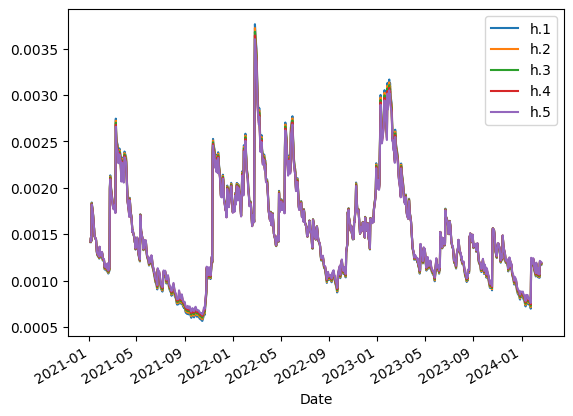

In [68]:
forecasts = res.forecast(horizon=5, start= np.min(ARIMA_tesla.resid.tail(-1).index))
forecasts.variance.plot()

In [69]:
#best (p,q) for arimagarch BITCOIN
aic_coeffs = None
bic_coeffs = None
best_aic = np.inf
best_bic = np.inf

for p in range(1, 5):
    for q in range(1, 5):
        model = arch_model(y=ARIMA_bitcoin.resid.tail(-1), vol='GARCH', p=p, q=q, dist='normal',).fit()
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeffs = (p, q)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p, q)

print(f"best aic p, q = {aic_coeffs}, best bic p, q = {bic_coeffs}")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14247030.718365401
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3299956.908386914
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1938385897157.2148
Iteration:      4,   Func. Count:     38,   Neg. LLF: 41335248.028360166
Iteration:      5,   Func. Count:     49,   Neg. LLF: -2325.1123640371447
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2325.112367157014
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9960697.193980891
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1485794.701925462
Iteration:      3,   Func. Count:     32,   Neg. LLF: 242756642529000.5
Iteration:      4,   Func. Count:     43,   Neg. LLF: -2326.569872738217
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2326.5698794096315
            Iterations: 8
  

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      1,   Func. Count:     10,   Neg. LLF: 67510219.98931172
Iteration:      2,   Func. Count:     25,   Neg. LLF: 23238218.940308798
Iteration:      3,   Func. Count:     40,   Neg. LLF: 4056.45175331664
Iteration:      4,   Func. Count:     54,   Neg. LLF: 14173423.038062098
Iteration:      5,   Func. Count:     69,   Neg. LLF: 1451.8606897292366
Iteration:      6,   Func. Count:     82,   Neg. LLF: 2992696.528584774
Iteration:      7,   Func. Count:     96,   Neg. LLF: -2194.312737509396
Iteration:      8,   Func. Count:    108,   Neg. LLF: -2003.9107486426676
Iteration:      9,   Func. Count:    118,   Neg. LLF: -2293.973837143809
Iteration:     10,   Func. Count:    128,   Neg. LLF: -2307.1995970027983
Iteration:     11,   Func. Count:    138,   Neg. LLF: -2307.4932301131803
Iteration:     12,   Func. Count:    148,   Neg. LLF: -2329.557689116162
Iteration:     13,   Func. Count:    158,   Neg. LLF: -2306.24610131673
Iteration:     14,   Func. Count:    168,   Neg. LLF:

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      4,   Func. Count:     58,   Neg. LLF: -2322.040617680016
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2322.0406267202784
            Iterations: 8
            Function evaluations: 58
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      9,   Neg. LLF: 6043671.603230848
Iteration:      2,   Func. Count:     23,   Neg. LLF: 429540.2980198539
Iteration:      3,   Func. Count:     37,   Neg. LLF: 34635.41046879532
Iteration:      4,   Func. Count:     52,   Neg. LLF: 8997.518856168303
Iteration:      5,   Func. Count:     65,   Neg. LLF: -1930.0121593914596
Iteration:      6,   Func. Count:     75,   Neg. LLF: 182126550.3115034
Iteration:      7,   Func. Count:     90,   Neg. LLF: 36593.56370239037
Iteration:      8,   Func. Count:    104,   Neg. LLF: 308048.22941765946
Iteration:      9,   Func. Count:    118,   Neg. LLF: 311047.94170748745
Iteration:     10,   Func. Count:    132,   Neg. LLF: 197467.13157

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [70]:
#Fit GARCH on the residuals of the ARIMA model for BITCOIN
arimagarch_bitcoin = arch_model(
    y=ARIMA_bitcoin.resid.tail(-1),
    vol='GARCH',
    p=1,
    q=4,
    dist='normal',
)
res=arimagarch_bitcoin.fit()
res.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 196426629.79650033
Iteration:      2,   Func. Count:     23,   Neg. LLF: 189782579.85768646
Iteration:      3,   Func. Count:     35,   Neg. LLF: 4935.694849573707


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      4,   Func. Count:     47,   Neg. LLF: 5034.259577572632
Iteration:      5,   Func. Count:     60,   Neg. LLF: 173823.6050820534
Iteration:      6,   Func. Count:     73,   Neg. LLF: 54643037.68437147
Iteration:      7,   Func. Count:     87,   Neg. LLF: -1488.2457838837793
Iteration:      8,   Func. Count:    100,   Neg. LLF: -2189.811207886156
Iteration:      9,   Func. Count:    111,   Neg. LLF: -1926.0517807595604
Iteration:     10,   Func. Count:    122,   Neg. LLF: -1340.0278995371782
Iteration:     11,   Func. Count:    131,   Neg. LLF: -2289.152152256722
Iteration:     12,   Func. Count:    140,   Neg. LLF: -2300.6585437976464
Iteration:     13,   Func. Count:    149,   Neg. LLF: -2307.4459954759136
Iteration:     14,   Func. Count:    158,   Neg. LLF: -2304.350025332959
Iteration:     15,   Func. Count:    167,   Neg. LLF: -2307.2542296297543
Iteration:     16,   Func. Count:    176,   Neg. LLF: -2303.5656641035985
Iteration:     17,   Func. Count:    185,   Neg

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2339.76
Distribution:                  Normal   AIC:                          -4665.52
Method:            Maximum Likelihood   BIC:                          -4630.23
                                        No. Observations:                 1143
Date:                Wed, Dec 18 2024   Df Residuals:                     1142
Time:                        12:08:22   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.4029e-04  8.370e-04      1.004      0.315 [-8.003e-04,2.481e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.1255e-05  6.058e-06      3.509  4.505e-04 [9.381e-06,3.313e-05]
alpha[1]       0.0906  5.174e-02      1.751  7.997e-02  [-1.082e-02,  0.192]
beta[1]    2.5019e-22      0.258  9.698e-22      1.000     [ -0.506,  0.506]
beta[2]    5.0048e-15      0.295  1.694e-14      1.000     [ -0.579,  0.579]
beta[3]        0.6494      0.125      5.182  2.195e-07     [  0.404,  0.895]
beta[4]        0.2358      0.416      0.567      0.570     [ -0.579,  1.050]
============================================================================

Covariance estimator: robust
"""

<Axes: xlabel='Date'>

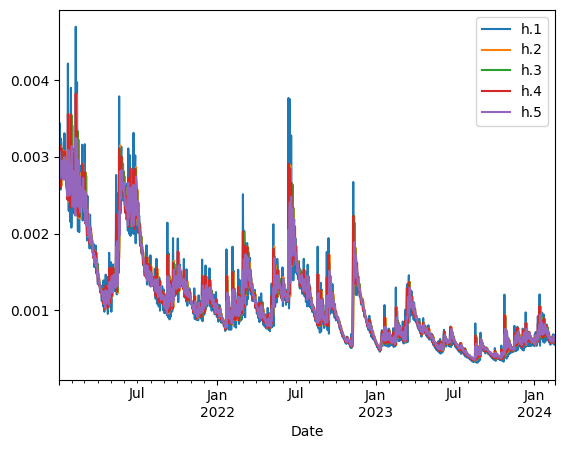

In [71]:
forecasts = res.forecast(horizon=5, start= np.min(ARIMA_bitcoin.resid.tail(-1).index))
forecasts.variance.plot()

In [72]:
#best (p,q) for arimagarch DOGECOIN
aic_coeffs = None
bic_coeffs = None
best_aic = np.inf
best_bic = np.inf

for p in range(1, 5):
    for q in range(1, 5):
        model = arch_model(y=ARIMA_dogecoin.resid.tail(-1), vol='GARCH', p=p, q=q, dist='normal',).fit()
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeffs = (p, q)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p, q)

print(f"best aic p, q = {aic_coeffs}, best bic p, q = {bic_coeffs}")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007325. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007325. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7667351.661093836
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1560.7676516633214
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1560.7676704642977
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      7,   Neg. LLF: 6390056.50699942
Iteration:      2,   Func. Count:     21,   Neg. LLF: 196572.40896860903
Iteration:      3,   Func. Count:     32,   Neg. LLF: 3448829.630788988
Iteration:      4,   Func. Count:     44,   Neg. LLF: 132638.47159770172
Iteration:      5,   Func. Count:     54,   Neg. LLF: -1594.0847286346564
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1594.084724140897
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      8,   Neg. LLF: 14846526.371678261
I

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007325. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007325. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

In [73]:
#Fit GARCH on the residuals of the ARIMA model for DOGECOIN
arimagarch_dogecoin = arch_model(
    y=ARIMA_dogecoin.resid.tail(-1),
    vol='GARCH',
    p=1,
    q=4,
    dist='normal',
)
res=arimagarch_dogecoin.fit()
res.summary()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007325. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      9,   Neg. LLF: 12423422.640733343
Iteration:      2,   Func. Count:     24,   Neg. LLF: -1629.0722605019453
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1629.0722762581065
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1629.07
Distribution:                  Normal   AIC:                          -3244.14
Method:            Maximum Likelihood   BIC:                          -3208.85
                                        No. Observations:                 1143
Date:                Wed, Dec 18 2024   Df Residuals:                     1142
Time:                        12:08:23   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.5821e-04  1.063e-03     -0.713      0.476 [-2.841e-03,1.325e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.4666e-04  2.025e-04      0.724      0.469 [-2.502e-04,5.435e-04]
alpha[1]       0.1000  9.601e-02      1.042      0.298   [-8.817e-02,  0.288]
beta[1]        0.2200      0.330      0.668      0.504      [ -0.426,  0.866]
beta[2]        0.2200      0.605      0.364      0.716      [ -0.965,  1.405]
beta[3]        0.2200      0.902      0.244      0.807      [ -1.548,  1.988]
beta[4]        0.2200      1.009      0.218      0.827      [ -1.758,  2.198]
=============================================================================

Covariance estimator: robust
"""

<Axes: xlabel='Date'>

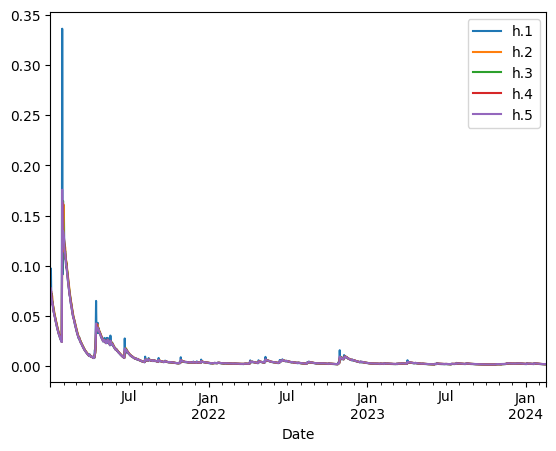

In [74]:
forecasts = res.forecast(horizon=5, start= np.min(ARIMA_dogecoin.resid.tail(-1).index))
forecasts.variance.plot()

Compare information criterions for In-sample predictive ability

In [75]:
print(f'ARIMA_tesla_AIC: {ARIMA_tesla.aic}')
print(f'ARIMA_bitcoin_AIC: {ARIMA_bitcoin.aic}')
print(f'ARIMA_dogecoin_AIC: {ARIMA_dogecoin.aic}')

ARIMA_tesla_AIC: -2869.7968598939206
ARIMA_bitcoin_AIC: -4512.0042454513705
ARIMA_dogecoin_AIC: -2350.475558865307


In [76]:
print(f'garch_tesla_AIC: {garch_tesla.fit().aic}',
      f'garch_bitcoin_AIC: {garch_bitcoin.fit().aic}',
      f'garch_dogecoin_AIC: {garch_dogecoin.fit().aic}'
      )

Iteration:      1,   Func. Count:      6,   Neg. LLF: 19107588.63572011
Iteration:      2,   Func. Count:     17,   Neg. LLF: -968.3813937708113
Iteration:      3,   Func. Count:     25,   Neg. LLF: -523.5230071781994
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1431.9197739694239
Iteration:      5,   Func. Count:     42,   Neg. LLF: -1441.6738995535864
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1445.864900861629
Iteration:      7,   Func. Count:     58,   Neg. LLF: -1457.2888584700954
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1457.2888697759813
            Iterations: 7
            Function evaluations: 68
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      9,   Neg. LLF: 123230296.26874357
Iteration:      2,   Func. Count:     23,   Neg. LLF: 152218676897.08957
Iteration:      3,   Func. Count:     37,   Neg. LLF: -1104.303415080219
Iteration:      4,   Func. Count:     50,   Neg. LLF: 51808

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      2,   Func. Count:     20,   Neg. LLF: 371436.59051916393
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2158229.8993858686
Iteration:      4,   Func. Count:     36,   Neg. LLF: 289.4294419363965
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2141.376743135023
Iteration:      6,   Func. Count:     52,   Neg. LLF: 804.0759204447363
Iteration:      7,   Func. Count:     59,   Neg. LLF: 365.60092595001163
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1428.4678328187033
Iteration:      9,   Func. Count:     75,   Neg. LLF: 83395.02100418217
Iteration:     10,   Func. Count:     88,   Neg. LLF: 2036.9579262911147
Iteration:     11,   Func. Count:     96,   Neg. LLF: 323.1922750310879
Iteration:     12,   Func. Count:    103,   Neg. LLF: 259.7956487720228
Iteration:     13,   Func. Count:    110,   Neg. LLF: 302.4856673494951
Iteration:     14,   Func. Count:    117,   Neg. LLF: 193.75434305283068
Iteration:     15,   Func. Count:    125,   Neg. LLF: 143.

In [77]:
print(f'arimagarch_tesla_AIC: {arimagarch_tesla.fit().aic}',
      f'arimagarch_bitcoin_AIC: {arimagarch_bitcoin.fit().aic}',
      f'arimagarch_dogecoin_AIC: {arimagarch_dogecoin.fit().aic}'
      )

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1115877.643870364
Iteration:      2,   Func. Count:     17,   Neg. LLF: -392.2683919253934
Iteration:      3,   Func. Count:     27,   Neg. LLF: -877.8660032337172
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1462.325970485948
Iteration:      5,   Func. Count:     41,   Neg. LLF: -1465.5480176981132
Iteration:      6,   Func. Count:     46,   Neg. LLF: -1465.5480483301535
Iteration:      7,   Func. Count:     52,   Neg. LLF: -1465.5481340757995
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1465.5481499735702
            Iterations: 7
            Function evaluations: 62
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      9,   Neg. LLF: 196426629.79650033
Iteration:      2,   Func. Count:     23,   Neg. LLF: 189782579.85768646
Iteration:      3,   Func. Count:     35,   Neg. LLF: 4935.694849573707
Iteration:      4,   Func. Count:     47,   Neg. LLF: 5034.2

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     10,   Func. Count:    122,   Neg. LLF: -1340.0278995371782
Iteration:     11,   Func. Count:    131,   Neg. LLF: -2289.152152256722
Iteration:     12,   Func. Count:    140,   Neg. LLF: -2300.6585437976464
Iteration:     13,   Func. Count:    149,   Neg. LLF: -2307.4459954759136
Iteration:     14,   Func. Count:    158,   Neg. LLF: -2304.350025332959
Iteration:     15,   Func. Count:    167,   Neg. LLF: -2307.2542296297543
Iteration:     16,   Func. Count:    176,   Neg. LLF: -2303.5656641035985
Iteration:     17,   Func. Count:    185,   Neg. LLF: -2337.7209472698
Iteration:     18,   Func. Count:    193,   Neg. LLF: -2328.6559267123685
Iteration:     19,   Func. Count:    202,   Neg. LLF: -2335.66788657651
Iteration:     20,   Func. Count:    211,   Neg. LLF: -2338.9581630296375
Iteration:     21,   Func. Count:    220,   Neg. LLF: -2339.508300598823
Iteration:     22,   Func. Count:    228,   Neg. LLF: -2339.686617929562
Iteration:     23,   Func. Count:    236,   Neg

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007325. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [78]:
x_values = ['tesla', 'bitcoin', 'dogecoin']

# Loop through each 'x' value and compare the AIC values
for x in x_values:
    # Get the AIC values for ARIMA, GARCH, and ARIMAGARCH for the current 'x'
    arima_aic = globals()[f"ARIMA_{x}"].aic
    garch_aic = globals()[f"garch_{x}"].fit().aic
    arimagarch_aic = globals()[f"arimagarch_{x}"].fit().aic

    # Compare the AIC values
    min_aic = min(arima_aic, garch_aic, arimagarch_aic)
    if min_aic == arima_aic:
        print(f"The best model for {x} is ARIMA with AIC: {arima_aic}")
    elif min_aic == garch_aic:
        print(f"The best model for {x} is GARCH with AIC: {garch_aic}")
    else:
        print(f"The best model for {x} is ARIMAGARCH with AIC: {arimagarch_aic}")


Iteration:      1,   Func. Count:      6,   Neg. LLF: 19107588.63572011
Iteration:      2,   Func. Count:     17,   Neg. LLF: -968.3813937708113
Iteration:      3,   Func. Count:     25,   Neg. LLF: -523.5230071781994
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1431.9197739694239
Iteration:      5,   Func. Count:     42,   Neg. LLF: -1441.6738995535864
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1445.864900861629
Iteration:      7,   Func. Count:     58,   Neg. LLF: -1457.2888584700954
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1457.2888697759813
            Iterations: 7
            Function evaluations: 68
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1115877.643870364
Iteration:      2,   Func. Count:     17,   Neg. LLF: -392.2683919253934
Iteration:      3,   Func. Count:     27,   Neg. LLF: -877.8660032337172
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1462.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001486. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

Iteration:      7,   Func. Count:     82,   Neg. LLF: -2241.327730959506
Iteration:      8,   Func. Count:     91,   Neg. LLF: -2303.9107088391324
Iteration:      9,   Func. Count:    100,   Neg. LLF: -2308.3373466024013
Iteration:     10,   Func. Count:    109,   Neg. LLF: -2309.1190964984658
Iteration:     11,   Func. Count:    118,   Neg. LLF: -2299.914061925336
Iteration:     12,   Func. Count:    127,   Neg. LLF: -2307.3191628438035
Iteration:     13,   Func. Count:    136,   Neg. LLF: -2338.56408635143
Iteration:     14,   Func. Count:    144,   Neg. LLF: -2337.3844212136582
Iteration:     15,   Func. Count:    153,   Neg. LLF: -2329.2908375680854
Iteration:     16,   Func. Count:    162,   Neg. LLF: -2339.544889571991
Iteration:     17,   Func. Count:    170,   Neg. LLF: -2339.6714010545993
Iteration:     18,   Func. Count:    178,   Neg. LLF: -2339.72541870433
Iteration:     19,   Func. Count:    186,   Neg. LLF: -2339.7431027475986
Iteration:     20,   Func. Count:    194,   N

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      3,   Func. Count:     27,   Neg. LLF: 2158229.8993858686
Iteration:      4,   Func. Count:     36,   Neg. LLF: 289.4294419363965
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2141.376743135023
Iteration:      6,   Func. Count:     52,   Neg. LLF: 804.0759204447363
Iteration:      7,   Func. Count:     59,   Neg. LLF: 365.60092595001163
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1428.4678328187033
Iteration:      9,   Func. Count:     75,   Neg. LLF: 83395.02100418217
Iteration:     10,   Func. Count:     88,   Neg. LLF: 2036.9579262911147
Iteration:     11,   Func. Count:     96,   Neg. LLF: 323.1922750310879
Iteration:     12,   Func. Count:    103,   Neg. LLF: 259.7956487720228
Iteration:     13,   Func. Count:    110,   Neg. LLF: 302.4856673494951
Iteration:     14,   Func. Count:    117,   Neg. LLF: 193.75434305283068
Iteration:     15,   Func. Count:    125,   Neg. LLF: 143.47861998873947
Iteration:     16,   Func. Count:    132,   Neg. LLF: 138.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007325. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Structural Breaks
-

In [79]:
#fit AR to ARIMA residuals and use lags as x_series
#Tesla
aic_coeff = None
bic_coeff = None
best_aic = np.inf
best_bic = np.inf

for p in range(1, 10):
        model = ARIMA(endog=tesla_predict, order=(p, 1, 0)).fit(cov_type="robust")
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeff = (p)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p)

print(f"best aic p = {aic_coeff}, best bic p = {bic_coeff}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


best aic p = None, best bic p = 1


In [80]:
ar_tesla = ARIMA(endog=tesla_predict, order=(1, 1, 0)).fit(cov_type="robust")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [81]:
#find the dates at which min and max occured
min_date = tesla_predict.idxmin()
min_value = tesla_predict.min()

max_date = tesla_predict.idxmax()
max_value = tesla_predict.max()

print(f"The date with the minimum value is: {min_date}")
print(f"The minimum value is: {min_value}")
print(f"The date with the maximum value is: {max_date}")
print(f"The maxium value is: {max_value}")

The date with the minimum value is: 2023-01-09 00:00:00
The minimum value is: 4.636263678661553
The date with the maximum value is: 2021-11-05 00:00:00
The maxium value is: 6.029974553250597


In [82]:
min_date_int = tesla_predict.index.get_loc(min_date) + 1
max_date_int = tesla_predict.index.get_loc(max_date) + 1
print({min_date_int})
print({max_date_int})

{507}
{213}


In [83]:
t11 = chow_test(
    y_series=tesla_predict.tail(-1),
    X_series=tesla_predict.shift(1).dropna(),
    last_index= min_date_int-1,
    first_index=min_date_int,
    significance=.05
)

t12 = chow_test(
    y_series=tesla_predict.tail(-1),
    X_series=tesla_predict.shift(1).dropna(),
    last_index=max_date_int-1,
    first_index=max_date_int,
    significance=.05
)

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 9.24118074530721, P_value: 0.00010799844950326598
Fail to reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 1.8295150606495971, P_value: 0.16117940019823696


In [84]:
# 5% quantile for QLR its 8.68
print(f'{max(9.240264685775621, 1.8284086768202408) = } > 8.68')

max(9.240264685775621, 1.8284086768202408) = 9.240264685775621 > 8.68


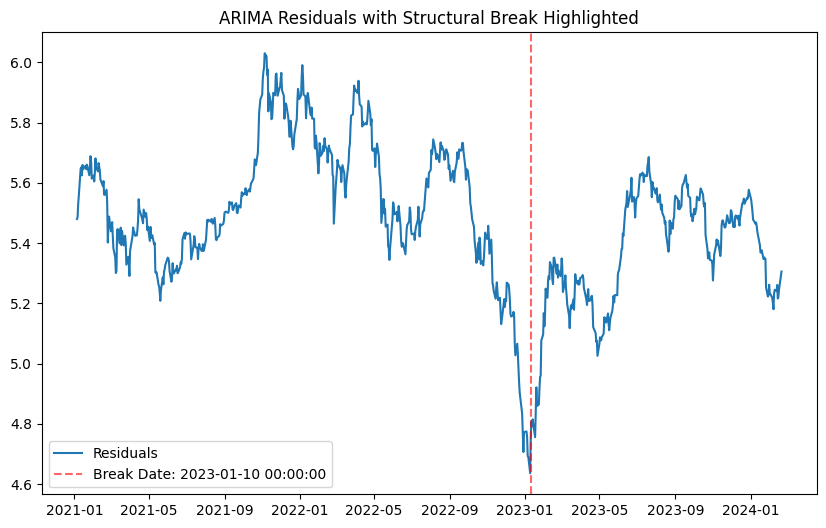

The date corresponding to the break at index 507 is: 2023-01-10 00:00:00


In [85]:
# Find the date corresponding to the 29th index in the series
break_index = 507
break_date = tesla_predict.index[break_index]

# Plot the residuals and highlight the break date
plt.figure(figsize=(10, 6))
plt.plot(tesla_predict, label='Residuals')
plt.axvline(x=break_date, color='red',alpha=0.6, linestyle='--', label=f'Break Date: {break_date}')
plt.title('ARIMA Residuals with Structural Break Highlighted')
plt.legend()
plt.show()

print(f"The date corresponding to the break at index {break_index} is: {break_date}")


There is structural break in TESLA

In [86]:
#BITCOIN
#fit AR to ARIMA in-sample predictions and use lags as x_series
aic_coeff = None
bic_coeff = None
best_aic = np.inf
best_bic = np.inf

for p in range(1, 10):
        model = ARIMA(endog=bitcoin_predict, order=(p, 1, 0)).fit(cov_type="robust")
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeff = (p)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p)

print(f"best aic p = {aic_coeff}, best bic p = {bic_coeff}")


best aic p = None, best bic p = 1


In [87]:
ar_bitcoin = ARIMA(endog=bitcoin_predict, order=(1, 1, 0)).fit(cov_type="robust")

In [88]:
#find the dates at which min and max occured
min_date = bitcoin_predict.idxmin()
min_value = bitcoin_predict.min()

max_date = bitcoin_predict.idxmax()
max_value = bitcoin_predict.max()

print(f"The date with the minimum value is: {min_date}")
print(f"The minimum value is: {min_value}")
print(f"The date with the maximum value is: {max_date}")
print(f"The maxium value is: {max_value}")

The date with the minimum value is: 2022-11-23 00:00:00
The minimum value is: 9.66664438739956
The date with the maximum value is: 2021-11-10 00:00:00
The maxium value is: 11.120619411108223


In [89]:
min_date_int = bitcoin_predict.index.get_loc(min_date) + 1
max_date_int = bitcoin_predict.index.get_loc(max_date) + 1
print({min_date_int})
print({max_date_int})

{691}
{313}


In [90]:
t11 = chow_test(
    y_series=bitcoin_predict.tail(-1),
    X_series=bitcoin_predict.shift(1).dropna(),
    last_index= min_date_int-1,
    first_index=min_date_int,
    significance=.05
)

t12 = chow_test(
   y_series=bitcoin_predict.tail(-1),
    X_series=bitcoin_predict.shift(1).dropna(),
    last_index=max_date_int-1,
    first_index=max_date_int,
    significance=.05
)

Fail to reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 1.1295900541084092, P_value: 0.3235280988097812
Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 4.362292528691466, P_value: 0.012963196378065311


In [91]:
# 5% quantile for QLR its 8.68
print(f'{max(1.12959005410870382, 4.362292528691762) = } < 8.68')

max(1.12959005410870382, 4.362292528691762) = 4.362292528691762 < 8.68


There is no structural break in BITCOIN

In [92]:
#DOGECOIN
#fit AR to ARIMA in-sample predictions and use lags as x_series
aic_coeff = None
bic_coeff = None
best_aic = np.inf
best_bic = np.inf

for p in range(1, 10):
        model = ARIMA(endog=dogecoin_predict, order=(p, 0, 0)).fit(cov_type="robust")
        if model.bic < best_bic:
            best_bic = model.bic
            bic_coeff = (p)
        if model.aic < best_aic:
            best_aic = model.aic
            aic_coeffs = (p)

print(f"best aic p = {aic_coeff}, best bic p = {bic_coeff}")


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

best aic p = None, best bic p = 3


In [93]:
ar_dogecoin = ARIMA(endog=dogecoin_predict, order=(3, 0, 0)).fit(cov_type="robust")

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [94]:
lags = [dogecoin_predict.shift(i) for i in range(1, 4)]
lagged_data = pd.DataFrame({f'Lag_{i}': lags[i-1] for i in range(1, 4)})
lagged_data.dropna().head()

,Lag_1,Lag_2,Lag_3
2021-01-05,-4.587288,-5.177269,-5.363058
2021-01-06,-4.637753,-4.587288,-5.177269
2021-01-07,-4.555807,-4.637753,-4.587288
2021-01-08,-4.629894,-4.555807,-4.637753
2021-01-09,-4.590515,-4.629894,-4.555807


In [95]:
#find the dates at which min and max occured
min_date = dogecoin_predict.tail(-30).idxmin()
min_value = dogecoin_predict.tail(-30).min()

max_date = dogecoin_predict.idxmax()
max_value = dogecoin_predict.max()

print(f"The date with the minimum value is: {min_date}")
print(f"The minimum value is: {min_value}")
print(f"The date with the maximum value is: {max_date}")
print(f"The maxium value is: {max_value}")

The date with the minimum value is: 2021-02-03 00:00:00
The minimum value is: -3.4777749763431847
The date with the maximum value is: 2021-05-09 00:00:00
The maxium value is: -0.39258537997282783


In [96]:
min_date_int = dogecoin_predict.index.get_loc(min_date) + 1
max_date_int = dogecoin_predict.index.get_loc(max_date) + 1
print({min_date_int})
print({max_date_int})

{33}
{128}


In [97]:
t11 = chow_test(
    y_series=dogecoin_predict.tail(-3),
    X_series=lagged_data.dropna(),
    last_index= min_date_int-1,
    first_index=min_date_int,
    significance=.05
)

t12 = chow_test(
    y_series=dogecoin_predict.tail(-3),
    X_series=lagged_data.dropna(),
    last_index=max_date_int-1,
    first_index=max_date_int,
    significance=.05
)

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 9.925881615705055, P_value: 6.780396866190586e-08
Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 8.725811673018654, P_value: 6.151955108668616e-07


In [98]:
# 5% quantile for QLR its 8.68
print(f'{max(9.925251520206674, 8.725924423365816) = } > 8.68')

max(9.925251520206674, 8.725924423365816) = 9.925251520206674 > 8.68


There is structural Break in DOGECOIN

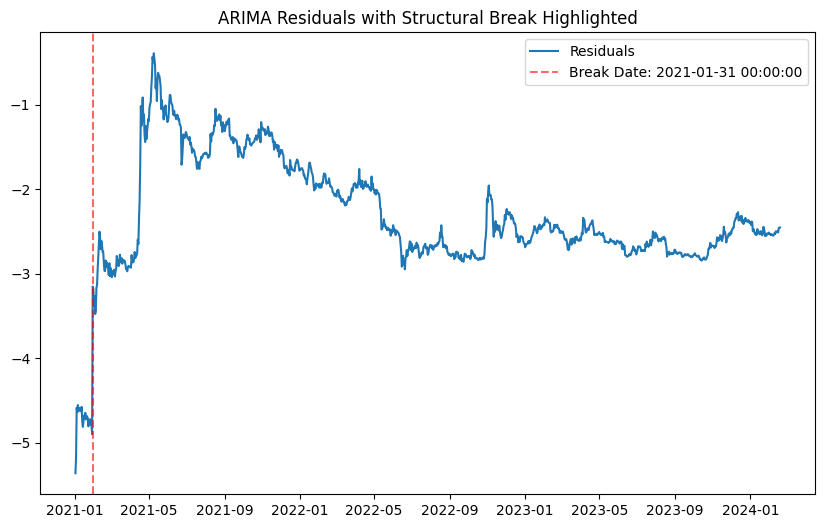

The date corresponding to the break at index 29 is: 2021-01-31 00:00:00


In [99]:

# Find the date corresponding to the 29th index in the series
break_index = 29
break_date = dogecoin_predict.index[break_index]

# Plot the residuals and highlight the break date
plt.figure(figsize=(10, 6))
plt.plot(dogecoin_predict, label='Residuals')
plt.axvline(x=break_date, color='red',alpha=0.6, linestyle='--', label=f'Break Date: {break_date}')
plt.title('ARIMA Residuals with Structural Break Highlighted')
plt.legend()
plt.show()

print(f"The date corresponding to the break at index {break_index} is: {break_date}")


Structural Breaks in Variances

In [100]:
#CUSUM test for TESLA
#H0: No structural break in variance

#Calculate resid
res=garch_tesla.fit()
std_resid = res.resid / res.conditional_volatility

test_res = cusum(std_resid, 3)
print(f'P-value: {test_res[1]}')

Iteration:      1,   Func. Count:      6,   Neg. LLF: 19107588.63572011
Iteration:      2,   Func. Count:     17,   Neg. LLF: -968.3813937708113
Iteration:      3,   Func. Count:     25,   Neg. LLF: -523.5230071781994
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1431.9197739694239
Iteration:      5,   Func. Count:     42,   Neg. LLF: -1441.6738995535864
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1445.864900861629
Iteration:      7,   Func. Count:     58,   Neg. LLF: -1457.2888584700954
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1457.2888697759813
            Iterations: 7
            Function evaluations: 68
            Gradient evaluations: 7
P-value: 0.5604681761353654


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 19107588.63572011
Iteration:      2,   Func. Count:     17,   Neg. LLF: -968.3813937708113
Iteration:      3,   Func. Count:     25,   Neg. LLF: -523.5230071781994
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1431.9197739694239
Iteration:      5,   Func. Count:     42,   Neg. LLF: -1441.6738995535864
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1445.864900861629
Iteration:      7,   Func. Count:     58,   Neg. LLF: -1457.2888584700954
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1457.2888697759813
            Iterations: 7
            Function evaluations: 68
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 19107588.63572011
Iteration:      2,   Func. Count:     17,   Neg. LLF: -968.3813937708113
Iteration:      3,   Func. Count:     25,   Neg. LLF: -523.5230071781994
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1431.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


(array([ 3.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  1.,  1.,
         3.,  0.,  6., 13., 10., 13., 17., 27., 23., 33., 40., 35., 49.,
        40., 49., 51., 55., 56., 36., 41., 23., 39., 31., 27., 13., 11.,
         9.,  6.,  4.,  3.,  4.,  2.,  3.,  0.,  1.,  1.,  1.]),
 array([-4.27408877, -4.12352725, -3.97296572, -3.8224042 , -3.67184268,
        -3.52128116, -3.37071963, -3.22015811, -3.06959659, -2.91903507,
        -2.76847354, -2.61791202, -2.4673505 , -2.31678898, -2.16622745,
        -2.01566593, -1.86510441, -1.71454289, -1.56398136, -1.41341984,
        -1.26285832, -1.1122968 , -0.96173527, -0.81117375, -0.66061223,
        -0.51005071, -0.35948918, -0.20892766, -0.05836614,  0.09219538,
         0.24275691,  0.39331843,  0.54387995,  0.69444147,  0.845003  ,
         0.99556452,  1.14612604,  1.29668756,  1.44724909,  1.59781061,
         1.74837213,  1.89893365,  2.04949518,  2.2000567 ,  2.35061822,
         2.50117974,  2.65174127,  2.80230279,  2.95286431,

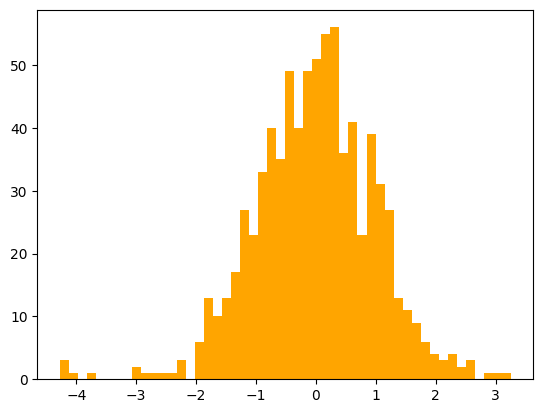

In [101]:
std_resid = garch_tesla.fit().resid / garch_tesla.fit().conditional_volatility
plt.hist(std_resid, facecolor = 'orange', bins=50, label='standardized resids')

In [102]:
#CUSUM test for BITCOIN
#H0: No structural break in variance

#Calculate resid
res=garch_bitcoin.fit()
std_resid = res.resid / res.conditional_volatility

test_res = cusum(std_resid, 6)
print(f'P-value: {test_res[1]}')

Iteration:      1,   Func. Count:      9,   Neg. LLF: 123230296.26874357
Iteration:      2,   Func. Count:     23,   Neg. LLF: 152218676897.08957
Iteration:      3,   Func. Count:     37,   Neg. LLF: -1104.303415080219
Iteration:      4,   Func. Count:     50,   Neg. LLF: 518088.10089783726
Iteration:      5,   Func. Count:     62,   Neg. LLF: -2138.1849316209077
Iteration:      6,   Func. Count:     73,   Neg. LLF: 320.020023918784
Iteration:      7,   Func. Count:     82,   Neg. LLF: -2241.327730959506
Iteration:      8,   Func. Count:     91,   Neg. LLF: -2303.9107088391324
Iteration:      9,   Func. Count:    100,   Neg. LLF: -2308.3373466024013
Iteration:     10,   Func. Count:    109,   Neg. LLF: -2309.1190964984658
Iteration:     11,   Func. Count:    118,   Neg. LLF: -2299.914061925336
Iteration:     12,   Func. Count:    127,   Neg. LLF: -2307.3191628438035
Iteration:     13,   Func. Count:    136,   Neg. LLF: -2338.56408635143
Iteration:     14,   Func. Count:    144,   Neg. 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      9,   Neg. LLF: 123230296.26874357
Iteration:      2,   Func. Count:     23,   Neg. LLF: 152218676897.08957
Iteration:      3,   Func. Count:     37,   Neg. LLF: -1104.303415080219
Iteration:      4,   Func. Count:     50,   Neg. LLF: 518088.10089783726
Iteration:      5,   Func. Count:     62,   Neg. LLF: -2138.1849316209077
Iteration:      6,   Func. Count:     73,   Neg. LLF: 320.020023918784
Iteration:      7,   Func. Count:     82,   Neg. LLF: -2241.327730959506
Iteration:      8,   Func. Count:     91,   Neg. LLF: -2303.9107088391324
Iteration:      9,   Func. Count:    100,   Neg. LLF: -2308.3373466024013
Iteration:     10,   Func. Count:    109,   Neg. LLF: -2309.1190964984658
Iteration:     11,   Func. Count:    118,   Neg. LLF: -2299.914061925336
Iteration:     12,   Func. Count:    127,   Neg. LLF: -2307.3191628438035
Iteration:     13,   Func. Count:    136,   Neg. LLF: -2338.56408635143
Iteration:     14,   Func. Count:    144,   Neg. 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     15,   Func. Count:    153,   Neg. LLF: -2329.2908375680854
Iteration:     16,   Func. Count:    162,   Neg. LLF: -2339.544889571991
Iteration:     17,   Func. Count:    170,   Neg. LLF: -2339.6714010545993
Iteration:     18,   Func. Count:    178,   Neg. LLF: -2339.72541870433
Iteration:     19,   Func. Count:    186,   Neg. LLF: -2339.7431027475986
Iteration:     20,   Func. Count:    194,   Neg. LLF: -2339.7547603390226
Iteration:     21,   Func. Count:    202,   Neg. LLF: -2339.7576824417583
Iteration:     22,   Func. Count:    210,   Neg. LLF: -2339.7579280794157
Iteration:     23,   Func. Count:    218,   Neg. LLF: -2339.7579370284316
Iteration:     24,   Func. Count:    226,   Neg. LLF: -2339.75793721434
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2339.7579373455915
            Iterations: 25
            Function evaluations: 227
            Gradient evaluations: 24
Iteration:      1,   Func. Count:      9,   Neg. LLF:

(array([  1.,   0.,   1.,   2.,   3.,   1.,   1.,   1.,   0.,   5.,   5.,
          3.,   3.,   3.,  10.,  14.,   8.,  14.,  19.,  28.,  48.,  65.,
         50., 101., 149., 137.,  98.,  87.,  60.,  57.,  32.,  35.,  27.,
         16.,  13.,  10.,  11.,   6.,   5.,   3.,   2.,   2.,   1.,   0.,
          2.,   1.,   2.,   0.,   0.,   1.]),
 array([-4.69585014, -4.5112452 , -4.32664027, -4.14203533, -3.95743039,
        -3.77282546, -3.58822052, -3.40361559, -3.21901065, -3.03440571,
        -2.84980078, -2.66519584, -2.48059091, -2.29598597, -2.11138103,
        -1.9267761 , -1.74217116, -1.55756623, -1.37296129, -1.18835635,
        -1.00375142, -0.81914648, -0.63454155, -0.44993661, -0.26533167,
        -0.08072674,  0.1038782 ,  0.28848313,  0.47308807,  0.65769301,
         0.84229794,  1.02690288,  1.21150781,  1.39611275,  1.58071769,
         1.76532262,  1.94992756,  2.13453249,  2.31913743,  2.50374237,
         2.6883473 ,  2.87295224,  3.05755718,  3.24216211,  3.42676705,
 

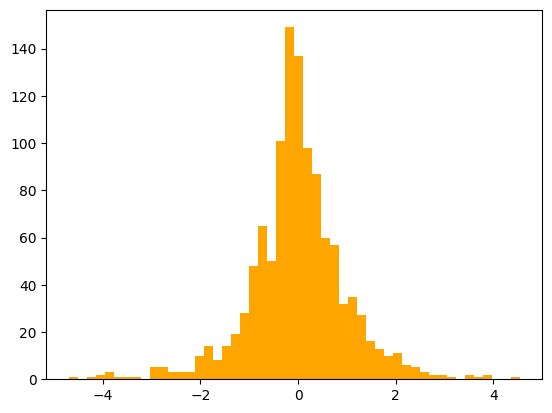

In [103]:
std_resid = garch_bitcoin.fit().resid / garch_bitcoin.fit().conditional_volatility
plt.hist(std_resid, facecolor = 'orange', bins=50, label='standardized resids')

In [104]:
#CUSUM test for DOGECOIN
#H0: No structural break in variance

#Calculate resid
res=garch_dogecoin.fit()
std_resid = res.resid / res.conditional_volatility

test_res = cusum(std_resid, 4)
print(f'P-value: {test_res[1]}')

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3257832778.717723
Iteration:      2,   Func. Count:     20,   Neg. LLF: 371436.59051916393
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2158229.8993858686
Iteration:      4,   Func. Count:     36,   Neg. LLF: 289.4294419363965
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2141.376743135023
Iteration:      6,   Func. Count:     52,   Neg. LLF: 804.0759204447363
Iteration:      7,   Func. Count:     59,   Neg. LLF: 365.60092595001163
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1428.4678328187033
Iteration:      9,   Func. Count:     75,   Neg. LLF: 83395.02100418217
Iteration:     10,   Func. Count:     88,   Neg. LLF: 2036.9579262911147
Iteration:     11,   Func. Count:     96,   Neg. LLF: 323.1922750310879
Iteration:     12,   Func. Count:    103,   Neg. LLF: 259.7956487720228
Iteration:     13,   Func. Count:    110,   Neg. LLF: 302.4856673494951
Iteration:     14,   Func. Count:    117,   Neg. LLF: 193.7

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3257832778.717723
Iteration:      2,   Func. Count:     20,   Neg. LLF: 371436.59051916393
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2158229.8993858686
Iteration:      4,   Func. Count:     36,   Neg. LLF: 289.4294419363965
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2141.376743135023
Iteration:      6,   Func. Count:     52,   Neg. LLF: 804.0759204447363
Iteration:      7,   Func. Count:     59,   Neg. LLF: 365.60092595001163
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1428.4678328187033
Iteration:      9,   Func. Count:     75,   Neg. LLF: 83395.02100418217
Iteration:     10,   Func. Count:     88,   Neg. LLF: 2036.9579262911147
Iteration:     11,   Func. Count:     96,   Neg. LLF: 323.1922750310879
Iteration:     12,   Func. Count:    103,   Neg. LLF: 259.7956487720228
Iteration:     13,   Func. Count:    110,   Neg. LLF: 302.4856673494951
Iteration:     14,   Func. Count:    117,   Neg. LLF: 193.7

(array([  1.,   0.,   3.,   1.,   1.,   2.,   3.,   5.,   6.,  14.,  22.,
         44., 152.,  69.,  30.,  32.,  19.,  11.,  13.,   8.,  12.,   6.,
         12.,  19.,  25.,  42., 204., 292.,  56.,  11.,   8.,   7.,   1.,
          1.,   2.,   3.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   1.]),
 array([-2.67121963, -2.53629918, -2.40137872, -2.26645827, -2.13153782,
        -1.99661736, -1.86169691, -1.72677645, -1.591856  , -1.45693555,
        -1.32201509, -1.18709464, -1.05217418, -0.91725373, -0.78233328,
        -0.64741282, -0.51249237, -0.37757191, -0.24265146, -0.10773101,
         0.02718945,  0.1621099 ,  0.29703036,  0.43195081,  0.56687127,
         0.70179172,  0.83671217,  0.97163263,  1.10655308,  1.24147354,
         1.37639399,  1.51131444,  1.6462349 ,  1.78115535,  1.91607581,
         2.05099626,  2.18591671,  2.32083717,  2.45575762,  2.59067808,
         2.72559853,  2.86051898,  2.99543944,  3.13035989,  3.26528035,
 

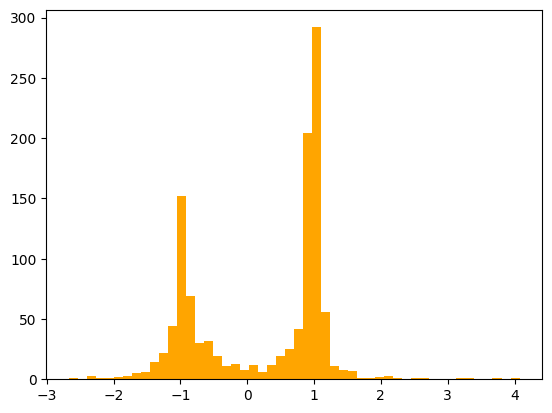

In [105]:
std_resid = garch_dogecoin.fit().resid / garch_dogecoin.fit().conditional_volatility
plt.hist(std_resid, facecolor = 'orange', bins=50, label='standardized resids')

H0 is rejected only for DOGECOIN. Thus, there is a structural break in DOGECOIN's variance

Multivariate Analysis
-

Since TESLA and BITCOIN are non-stationary while DOGECOIN is stationary, firstly we should check the possible cointegration between TESLA and BITCOIN


In [106]:
multi_data1 = pd.merge(train_tesla['Open'], train_bitcoin['Open'], on='Date', how='inner')
multi_data = pd.merge(multi_data1, train_dogecoin['Open'], on='Date', how='inner')
multi_data = multi_data.rename(columns={"TSLA": "open_tesla", "BTC-USD": "open_bitcoin", "DOGE-USD": "open_dogecoin"})
multi_data

Ticker,open_tesla,open_bitcoin,open_dogecoin
Date,,,
2021-01-04,5.479889,10.398518,-4.626905
2021-01-05,5.485709,10.372773,-4.628746
2021-01-06,5.532717,10.434516,-4.612900
2021-01-07,5.557639,10.514173,-4.560771
2021-01-08,5.653658,10.581058,-4.631206
...,...,...,...
2024-02-12,5.258068,10.785112,-2.510803
2024-02-13,5.214881,10.818605,-2.496983
2024-02-14,5.221976,10.814433,-2.512245


In [107]:
#cointegration  test for TESLA and BITCOIN
#H0: rk=0, H1: rk=1
jh_results = coint_johansen(multi_data, -1, 1)
print(jh_results.cvt)

[[21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]


In [108]:
print(jh_results.lr1)

[2.30010429e+01 5.57783708e+00 1.00170816e-02]


We reject H0. There is cointegration. Thus VECM is more efficient that VAR
(test GC to find direction)

Let us confirm

In [109]:
vecm_data =  multi_data
res = select_order(vecm_data.reset_index(drop=True), maxlags=20, deterministic="n")
res.selected_orders
res.summary()

,AIC,BIC,FPE,HQIC
0,-18.47,-18.39*,9.561e-09,-18.44
1,-18.51,-18.38,9.136e-09,-18.46*
2,-18.51,-18.32,9.174e-09,-18.44
3,-18.52,-18.28,9.092e-09,-18.42
4,-18.50,-18.21,9.196e-09,-18.39
5,-18.50,-18.16,9.208e-09,-18.37
6,-18.49,-18.09,9.294e-09,-18.34
7,-18.53,-18.07,8.968e-09,-18.35
8,-18.54*,-18.03,8.889e-09*,-18.34
9,-18.53,-17.97,8.938e-09,-18.32


By AIC, we use 8 lags

In [110]:
res = select_coint_rank(vecm_data, -1, 8)
res.summary()

r_0,r_1,test statistic,critical value
0,3,31.46,24.28
1,3,8.293,12.32


In [111]:
res.rank

1

In [112]:
vecm = VECM(
    endog=vecm_data.reset_index(drop=True),
    k_ar_diff=8,
    coint_rank=1,
    deterministic="n"
)
vecm_res = vecm.fit()
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.open_tesla,-0.0682,0.037,-1.855,0.064,-0.140,0.004
L1.open_bitcoin,0.0173,0.041,0.422,0.673,-0.063,0.097
L1.open_dogecoin,-0.0083,0.016,-0.510,0.610,-0.040,0.024
L2.open_tesla,-0.0089,0.037,-0.241,0.810,-0.081,0.063
L2.open_bitcoin,0.0516,0.040,1.277,0.202,-0.028,0.131
L2.open_dogecoin,-0.0020,0.016,-0.125,0.900,-0.034,0.030
L3.open_tesla,-0.0390,0.037,-1.066,0.286,-0.111,0.033
L3.open_bitcoin,-0.0332,0.040,-0.824,0.410,-0.112,0.046
L3.open_dogecoin,0.0082,0.016,0.504,0.615,-0.024,0.040
L4.open_tesla,0.0801,0.037,2.169,0.030,0.008,0.152


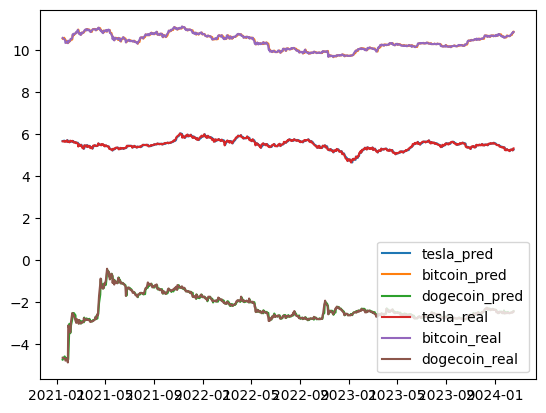

In [113]:
#in-sample prediction
vecm_insample = pd.DataFrame(vecm_res.fittedvalues, columns=['open_tesla', 'open_bitcoin','open_dogecoin'])
vecm_insample.index = vecm_data.tail(-9).index
plt.plot(vecm_insample['open_tesla'], label="tesla_pred")
plt.plot(vecm_insample['open_bitcoin'], label="bitcoin_pred")
plt.plot(vecm_insample['open_dogecoin'], label="dogecoin_pred")

plt.plot(vecm_data.tail(-9)['open_tesla'], label="tesla_real")
plt.plot(vecm_data.tail(-9)['open_bitcoin'], label="bitcoin_real")
plt.plot(vecm_data.tail(-9)['open_dogecoin'], label="dogecoin_real")

plt.legend()

Impulse-Response-Analysis

are used to study the effects of shocks or impulses in a VECM system. It traces out one unit or one standard deviation shock to an endogenous variable and its effects on all the endogenous variables in a VECM, keeping all other variables and shocks constant.



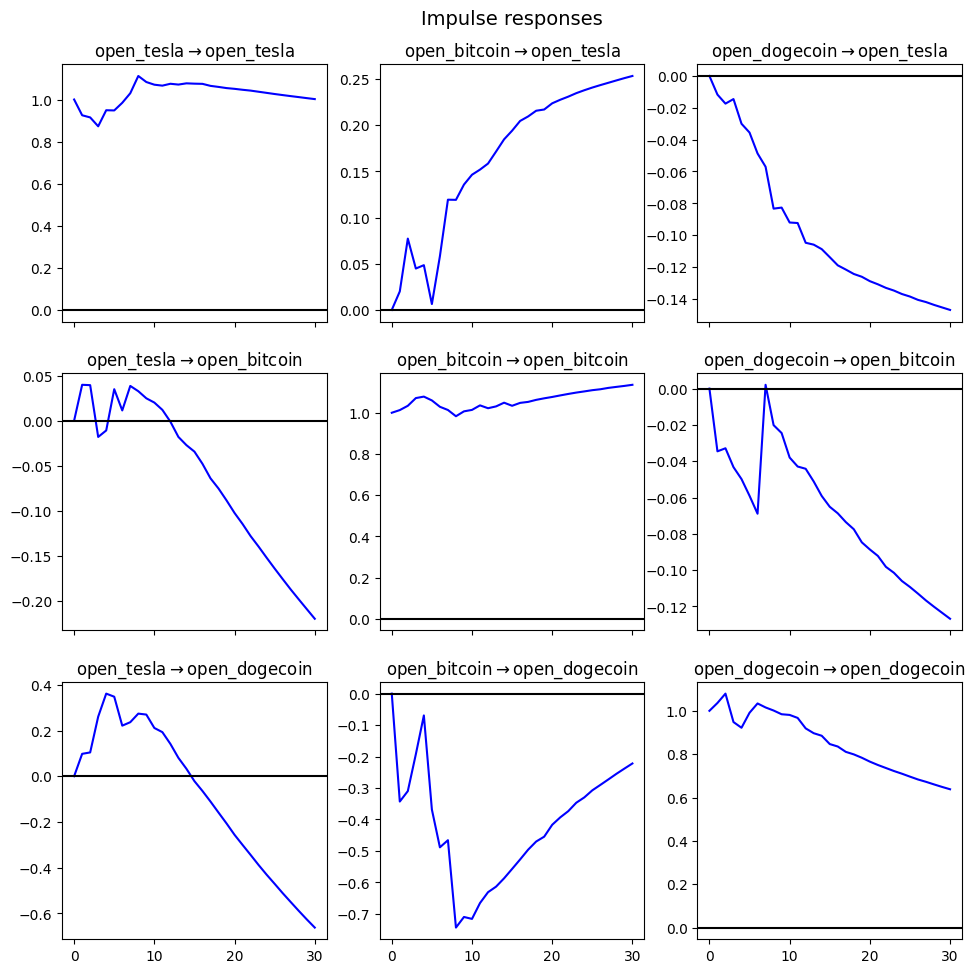

In [114]:
num_periods = 30
ir = vecm_res.irf(periods=num_periods)
ir.plot(plot_stderr=False);

In [115]:
#Testing for nonnormality
norm_test = vecm_res.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
6.807e+05,12.59,0.000,6


In [116]:
#Testing for residual autocorrelation
white_test = vecm_res.test_whiteness()
white_test.summary()

Test statistic,Critical value,p-value,df
22.90,25.00,0.086,15


Out-of-sample Forecasts
--

ARIMA-GARCH

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03959. Parameter
estimation work better

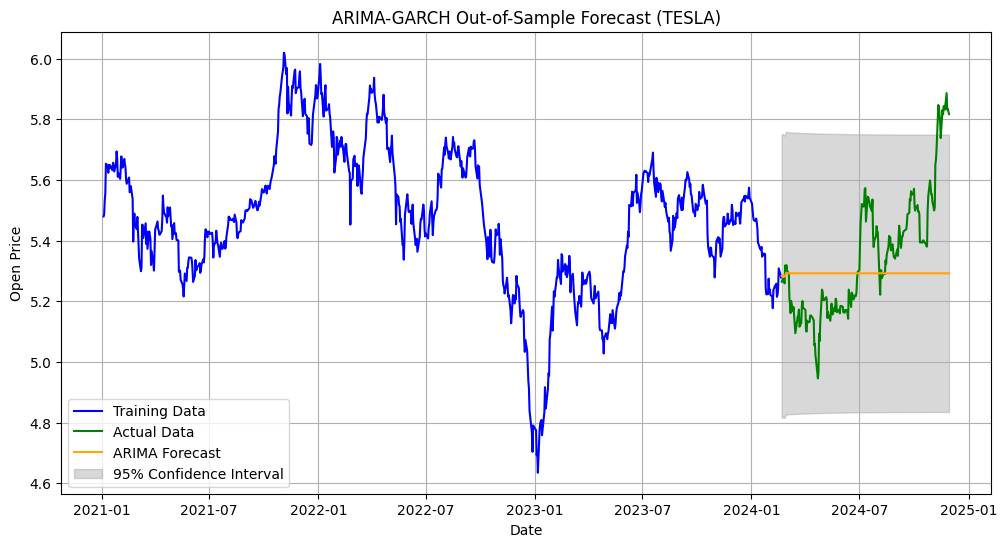

            Mean_Forecast  Variance_Forecast
Date                                        
2024-02-21       5.283663           0.054374
2024-02-22       5.281247           0.054331
2024-02-23       5.286214           0.054288
2024-02-26       5.280980           0.054247
2024-02-27       5.286876           0.054206
...                   ...                ...
2024-11-22       5.292366           0.052278
2024-11-25       5.292366           0.052278
2024-11-26       5.292366           0.052277
2024-11-27       5.292366           0.052276
2024-11-29       5.292366           0.052275

[197 rows x 2 columns]


In [117]:
# Fit ARIMA model
arima_order = (0, 1, 8)
arima_model = ARIMA(train_tesla['Open'], order=arima_order).fit()

# Get residuals for GARCH modeling
arima_residuals = arima_model.resid

# Fit GARCH model
garch_model = arch_model(arima_residuals.dropna(), vol='Garch', p=1, q=1, dist='normal').fit(disp="off")

# ARIMA forecast (mean process)
forecast_steps = len(test_tesla)
arima_forecast = arima_model.forecast(steps=forecast_steps)

# GARCH forecast (variance process)
garch_forecast = garch_model.forecast(horizon=forecast_steps)

# Combine forecasts
forecast_results = pd.DataFrame({
    'Date': test_tesla.index,
    'Mean_Forecast': arima_forecast.values,  # Correctly handle ARIMA forecast as a Series
    'Variance_Forecast': garch_forecast.variance.iloc[-1].values  # Extract variance
}).set_index('Date')

# Plot ARIMA-GARCH Forecast
plt.figure(figsize=(12, 6))
plt.plot(train_tesla['Open'], label='Training Data', color='blue')
plt.plot(test_tesla['Open'], label='Actual Data', color='green')
plt.plot(forecast_results['Mean_Forecast'], label='ARIMA Forecast', color='orange')
plt.fill_between(
    forecast_results.index,
    forecast_results['Mean_Forecast'] - 2 * np.sqrt(forecast_results['Variance_Forecast']),
    forecast_results['Mean_Forecast'] + 2 * np.sqrt(forecast_results['Variance_Forecast']),
    color='gray', alpha=0.3, label='95% Confidence Interval'
)
plt.legend()
plt.title('ARIMA-GARCH Out-of-Sample Forecast (TESLA)')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid()
plt.show()

print(forecast_results)

In [125]:
# Ensure test_tesla['Open'] is a 1-dimensional pandas Series
actual_tesla = pd.Series(test_tesla['Open'].values.flatten(), index=test_tesla.index)

# Ensure forecasted_values is a 1-dimensional Series (convert to 1D if necessary)
forecasted_tesla = pd.Series(forecast_results['Mean_Forecast'].values.flatten(), index=forecast_results.index)

# Manually align by intersection of indices (join='inner')
aligned_actual_tesla = actual_tesla[actual_tesla.index.isin(forecasted_tesla.index)]
aligned_forecasted_tesla = forecasted_tesla[forecasted_tesla.index.isin(actual_tesla.index)]

# Apply exp to revert log transformation
aligned_actual_tesla = np.exp(aligned_actual_tesla)
aligned_forecasted_tesla = np.exp(aligned_forecasted_tesla)

# Check the alignment of both series
print(f"Length of aligned_actual_tesla: {len(aligned_actual_tesla)}")
print(f"Length of aligned_forecasted_tesla: {len(aligned_forecasted_tesla)}")

# Ensure that the aligned actual and forecasted values match
print(f"Aligned actual values head:\n{aligned_actual_tesla.tail()}")
print(f"Aligned forecasted values head:\n{aligned_forecasted_tesla.tail()}")

# Calculate Mean Squared Prediction Error (MSPE) on the original scale
mspe_tesla_arima = ((aligned_actual_tesla - aligned_forecasted_tesla) ** 2).mean()

print(f"Mean Squared Prediction Error (MSPE) on original scale (TESLA): {mspe_tesla_arima}")

Length of aligned_actual_tesla: 197
Length of aligned_forecasted_tesla: 197
Aligned actual values head:
Date
2024-11-22    341.089996
2024-11-25    360.140015
2024-11-26    341.000000
2024-11-27    341.799988
2024-11-29    336.079987
dtype: float64
Aligned forecasted values head:
Date
2024-11-22    198.813183
2024-11-25    198.813183
2024-11-26    198.813183
2024-11-27    198.813183
2024-11-29    198.813183
dtype: float64
Mean Squared Prediction Error (MSPE) on original scale (TESLA): 2479.555907830679


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.09332. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initiali

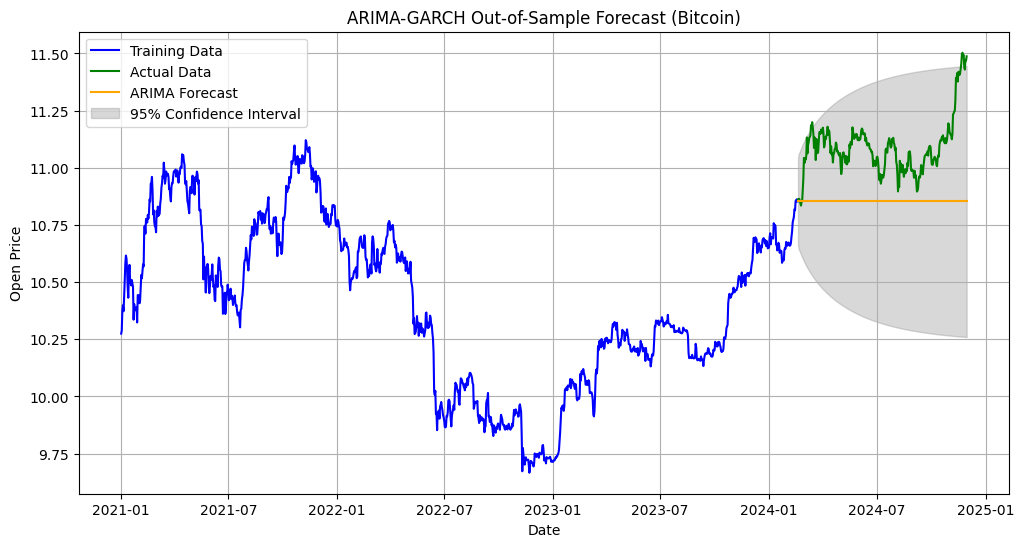

            Mean_Forecast  Variance_Forecast
Date                                        
2024-02-19      10.852477           0.008911
2024-02-20      10.852477           0.010677
2024-02-21      10.852477           0.011315
2024-02-22      10.852477           0.011909
2024-02-23      10.852477           0.012609
...                   ...                ...
2024-11-26      10.852477           0.087508
2024-11-27      10.852477           0.087566
2024-11-28      10.852477           0.087624
2024-11-29      10.852477           0.087681
2024-11-30      10.852477           0.087738

[286 rows x 2 columns]


In [127]:
# Fit ARIMA model (adjusted to ARIMA(0, 1, 0))
arima_order = (0, 1, 0)
arima_model_bitcoin = ARIMA(train_bitcoin['Open'], order=arima_order).fit()

# Get residuals for GARCH modeling
arima_residuals_bitcoin = arima_model_bitcoin.resid

# Fit GARCH model (adjusted to GARCH(1, 4))
garch_model_bitcoin = arch_model(arima_residuals_bitcoin.dropna(), vol='Garch', p=1, q=4, dist='normal').fit(disp="off")

# ARIMA forecast (mean process)
forecast_steps = len(test_bitcoin)
arima_forecast_bitcoin = arima_model_bitcoin.forecast(steps=forecast_steps)

# GARCH forecast (variance process)
garch_forecast_bitcoin = garch_model_bitcoin.forecast(horizon=forecast_steps)

# Combine forecasts
forecast_results_bitcoin = pd.DataFrame({
    'Date': test_bitcoin.index,
    'Mean_Forecast': arima_forecast_bitcoin.values,  # Correctly handle ARIMA forecast as a Series
    'Variance_Forecast': garch_forecast_bitcoin.variance.iloc[-1].values  # Extract variance
}).set_index('Date')

# Plot ARIMA-GARCH Forecast
plt.figure(figsize=(12, 6))
plt.plot(train_bitcoin['Open'], label='Training Data', color='blue')
plt.plot(test_bitcoin['Open'], label='Actual Data', color='green')
plt.plot(forecast_results_bitcoin['Mean_Forecast'], label='ARIMA Forecast', color='orange')
plt.fill_between(
    forecast_results_bitcoin.index,
    forecast_results_bitcoin['Mean_Forecast'] - 2 * np.sqrt(forecast_results_bitcoin['Variance_Forecast']),
    forecast_results_bitcoin['Mean_Forecast'] + 2 * np.sqrt(forecast_results_bitcoin['Variance_Forecast']),
    color='gray', alpha=0.3, label='95% Confidence Interval'
)
plt.legend()
plt.title('ARIMA-GARCH Out-of-Sample Forecast (Bitcoin)')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid()
plt.show()

print(forecast_results_bitcoin)

In [128]:
# Ensure test_bitcoin['Open'] is a 1-dimensional pandas Series
actual_bitcoin = pd.Series(test_bitcoin['Open'].values.flatten(), index=test_bitcoin.index)

# Ensure forecasted_values for Bitcoin is a 1-dimensional Series
forecasted_bitcoin = pd.Series(forecast_results_bitcoin['Mean_Forecast'].values.flatten(), index=forecast_results_bitcoin.index)

# Manually align by intersection of indices (join='inner')
aligned_actual_bitcoin = actual_bitcoin[actual_bitcoin.index.isin(forecasted_bitcoin.index)]
aligned_forecasted_bitcoin = forecasted_bitcoin[forecasted_bitcoin.index.isin(actual_bitcoin.index)]

# Apply exp to revert log transformation
aligned_actual_bitcoin = np.exp(aligned_actual_bitcoin)
aligned_forecasted_bitcoin = np.exp(aligned_forecasted_bitcoin)

# Calculate Mean Squared Prediction Error (MSPE) on the original scale
mspe_bitcoin_arima = ((aligned_actual_bitcoin - aligned_forecasted_bitcoin) ** 2).mean()

# Print the aligned actual and forecasted values for Bitcoin
print(f"Aligned actual values for Bitcoin:\n{aligned_actual_bitcoin.head()}")
print(f"Aligned forecasted values for Bitcoin:\n{aligned_forecasted_bitcoin.head()}")
print(f"MSPE for Bitcoin: {mspe_bitcoin_arima}")

Aligned actual values for Bitcoin:
Date
2024-02-19    52134.812500
2024-02-20    51777.726563
2024-02-21    52273.535156
2024-02-22    51854.644531
2024-02-23    51283.906250
dtype: float64
Aligned forecasted values for Bitcoin:
Date
2024-02-19    51661.96875
2024-02-20    51661.96875
2024-02-21    51661.96875
2024-02-22    51661.96875
2024-02-23    51661.96875
dtype: float64
MSPE for Bitcoin: 282732246.5323666


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

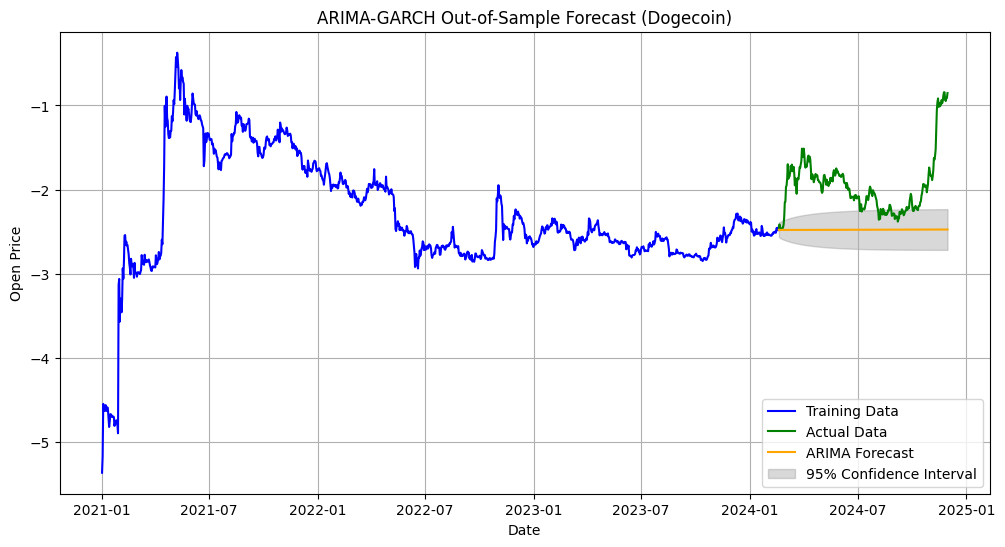

            Mean_Forecast  Variance_Forecast
Date                                        
2024-02-19      -2.478494           0.001834
2024-02-20      -2.477594           0.002083
2024-02-21      -2.482856           0.002242
2024-02-22      -2.478455           0.002433
2024-02-23      -2.480564           0.002607
...                   ...                ...
2024-11-26      -2.474691           0.014643
2024-11-27      -2.474672           0.014646
2024-11-28      -2.474654           0.014649
2024-11-29      -2.474635           0.014653
2024-11-30      -2.474617           0.014656

[286 rows x 2 columns]


In [129]:
# Fit ARIMA model (adjusted to ARIMA(4, 0, 5))
arima_order_dogecoin = (4, 0, 5)
arima_model_dogecoin = ARIMA(train_dogecoin['Open'], order=arima_order_dogecoin).fit()

# Get residuals for GARCH modeling
arima_residuals_dogecoin = arima_model_dogecoin.resid

# Fit GARCH model (adjusted to GARCH(1, 2))
garch_model_dogecoin = arch_model(arima_residuals_dogecoin.dropna(), vol='Garch', p=1, q=2, dist='normal').fit(disp="off")

# ARIMA forecast (mean process)
forecast_steps_dogecoin = len(test_dogecoin)
arima_forecast_dogecoin = arima_model_dogecoin.forecast(steps=forecast_steps_dogecoin)

# GARCH forecast (variance process)
garch_forecast_dogecoin = garch_model_dogecoin.forecast(horizon=forecast_steps_dogecoin)

# Combine forecasts
forecast_results_dogecoin = pd.DataFrame({
    'Date': test_dogecoin.index,
    'Mean_Forecast': arima_forecast_dogecoin.values,  # Correctly handle ARIMA forecast as a Series
    'Variance_Forecast': garch_forecast_dogecoin.variance.iloc[-1].values  # Extract variance
}).set_index('Date')

# Plot ARIMA-GARCH Forecast
plt.figure(figsize=(12, 6))
plt.plot(train_dogecoin['Open'], label='Training Data', color='blue')
plt.plot(test_dogecoin['Open'], label='Actual Data', color='green')
plt.plot(forecast_results_dogecoin['Mean_Forecast'], label='ARIMA Forecast', color='orange')
plt.fill_between(
    forecast_results_dogecoin.index,
    forecast_results_dogecoin['Mean_Forecast'] - 2 * np.sqrt(forecast_results_dogecoin['Variance_Forecast']),
    forecast_results_dogecoin['Mean_Forecast'] + 2 * np.sqrt(forecast_results_dogecoin['Variance_Forecast']),
    color='gray', alpha=0.3, label='95% Confidence Interval'
)
plt.legend()
plt.title('ARIMA-GARCH Out-of-Sample Forecast (Dogecoin)')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid()
plt.show()

print(forecast_results_dogecoin)


In [130]:
# Ensure test_dogecoin['Open'] is a 1-dimensional pandas Series
actual_dogecoin = pd.Series(test_dogecoin['Open'].values.flatten(), index=test_dogecoin.index)

# Ensure forecasted_values for Dogecoin is a 1-dimensional Series
forecasted_dogecoin = pd.Series(forecast_results_dogecoin['Mean_Forecast'].values.flatten(), index=forecast_results_dogecoin.index)

# Manually align by intersection of indices (join='inner')
aligned_actual_dogecoin = actual_dogecoin[actual_dogecoin.index.isin(forecasted_dogecoin.index)]
aligned_forecasted_dogecoin = forecasted_dogecoin[forecasted_dogecoin.index.isin(actual_dogecoin.index)]

# Apply exp to revert log transformation
aligned_actual_dogecoin = np.exp(aligned_actual_dogecoin)
aligned_forecasted_dogecoin = np.exp(aligned_forecasted_dogecoin)

# Calculate Mean Squared Prediction Error (MSPE) on the original scale
mspe_dogecoin_arima = ((aligned_actual_dogecoin - aligned_forecasted_dogecoin) ** 2).mean()

# Print the aligned actual and forecasted values for Dogecoin
print(f"Aligned actual values for Dogecoin:\n{aligned_actual_dogecoin.tail()}")
print(f"Aligned forecasted values for Dogecoin:\n{aligned_forecasted_dogecoin.tail()}")
print(f"MSPE for Dogecoin: {mspe_dogecoin_arima}")

Aligned actual values for Dogecoin:
Date
2024-11-26    0.393311
2024-11-27    0.387615
2024-11-28    0.401515
2024-11-29    0.402019
2024-11-30    0.425839
dtype: float64
Aligned forecasted values for Dogecoin:
Date
2024-11-26    0.084189
2024-11-27    0.084191
2024-11-28    0.084192
2024-11-29    0.084194
2024-11-30    0.084195
dtype: float64
MSPE for Dogecoin: 0.009696298487458531


VECM

In [131]:
vecm_test1 = pd.merge(test_tesla['Open'], test_bitcoin['Open'], on='Date', how='inner')
vecm_test = pd.merge(vecm_test1, test_dogecoin['Open'], on='Date', how='inner')
vecm_test = vecm_test.rename(columns={"TSLA": "open_tesla", "BTC-USD": "open_bitcoin", "DOGE-USD": "open_dogecoin"})


vecm_pred = vecm_res.predict(steps=len(vecm_test), alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=len(vecm_test), alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[ 5.31088678 10.86615884 -2.4465068 ]
 [ 5.31427547 10.86572958 -2.4415838 ]
 [ 5.32059977 10.86844749 -2.40326048]
 [ 5.3263692  10.87286543 -2.39961885]
 [ 5.32835445 10.87917148 -2.38899222]
 [ 5.3386571  10.88810384 -2.37130303]
 [ 5.34620233 10.89442972 -2.35377534]
 [ 5.3557893  10.90154452 -2.32516576]
 [ 5.35742507 10.90654982 -2.30426032]
 [ 5.3609763  10.91411353 -2.28212305]
 [ 5.36374765 10.91815662 -2.26177782]
 [ 5.36790116 10.92312465 -2.24348837]
 [ 5.37097883 10.92877724 -2.22563977]
 [ 5.37464222 10.93356102 -2.20901951]
 [ 5.37752072 10.93936856 -2.19206775]
 [ 5.38020088 10.94391709 -2.1751753 ]
 [ 5.38233169 10.94878403 -2.15837567]
 [ 5.38440514 10.95333723 -2.14364333]
 [ 5.38660887 10.95777487 -2.12820797]
 [ 5.38880582 10.96201255 -2.11406702]
 [ 5.39086709 10.96611105 -2.100051  ]
 [ 5.39291699 10.97012303 -2.08631729]
 [ 5.39475152 10.97404081 -2.07334349]
 [ 5.39656179 10.97789086 -2.06031948]
 [ 5.39826485 10.98149562 -2.04782906]
 [ 5.39998316 1

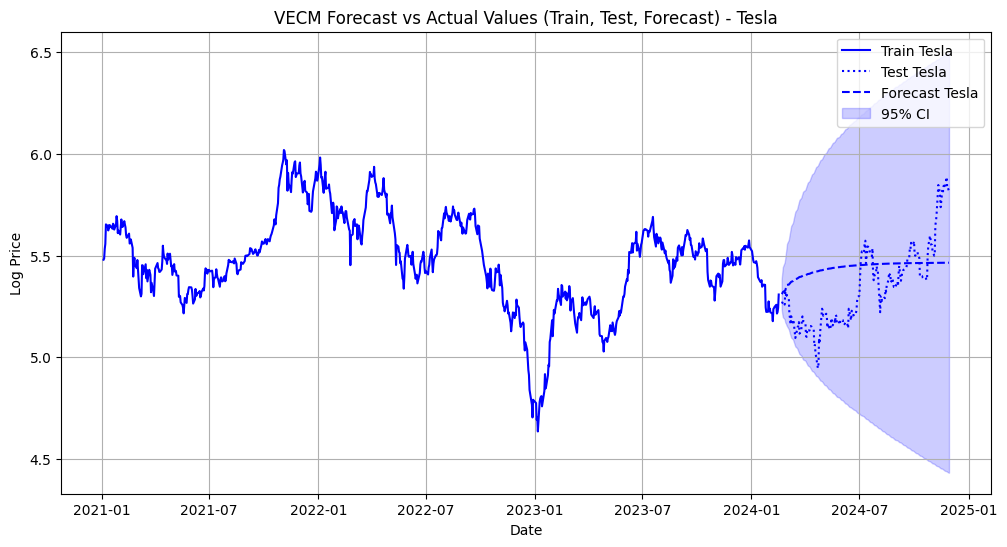

In [132]:
forecast_values, lower_bound, upper_bound = vecm_pred

# Extract confidence intervals for Tesla
lower_tesla = lower_bound[:, 0]
upper_tesla = upper_bound[:, 0]

# Prepare the figure
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(vecm_data.index, vecm_data['open_tesla'], label="Train Tesla", color='blue')

# Plot the test data
plt.plot(vecm_test.index, vecm_test['open_tesla'], label="Test Tesla", color='blue', linestyle='dotted')

# Plot the forecasted values
plt.plot(vecm_test.index, forecast_values[:, 0], label="Forecast Tesla", color='blue', linestyle='dashed')

# Add confidence intervals
plt.fill_between(vecm_test.index, lower_tesla, upper_tesla, color='blue', alpha=0.2, label='95% CI')

# Add labels and title
plt.title('VECM Forecast vs Actual Values (Train, Test, Forecast) - Tesla')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()

# Show the grid
plt.grid()

# Display the plot
plt.show()


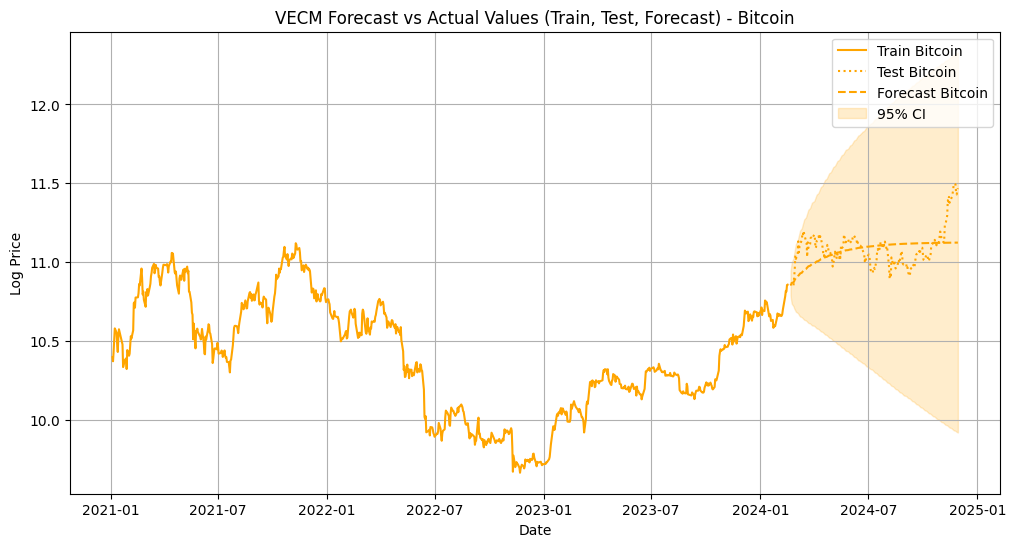

In [133]:
# Extract confidence intervals for Bitcoin
lower_bitcoin = lower_bound[:, 1]
upper_bitcoin = upper_bound[:, 1]

# Prepare the figure
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(vecm_data.index, vecm_data['open_bitcoin'], label="Train Bitcoin", color='orange')

# Plot the test data
plt.plot(vecm_test.index, vecm_test['open_bitcoin'], label="Test Bitcoin", color='orange', linestyle='dotted')

# Plot the forecasted values
plt.plot(vecm_test.index, forecast_values[:, 1], label="Forecast Bitcoin", color='orange', linestyle='dashed')

# Add confidence intervals
plt.fill_between(vecm_test.index, lower_bitcoin, upper_bitcoin, color='orange', alpha=0.2, label='95% CI')

# Add labels and title
plt.title('VECM Forecast vs Actual Values (Train, Test, Forecast) - Bitcoin')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()

# Show the grid
plt.grid()

# Display the plot
plt.show()


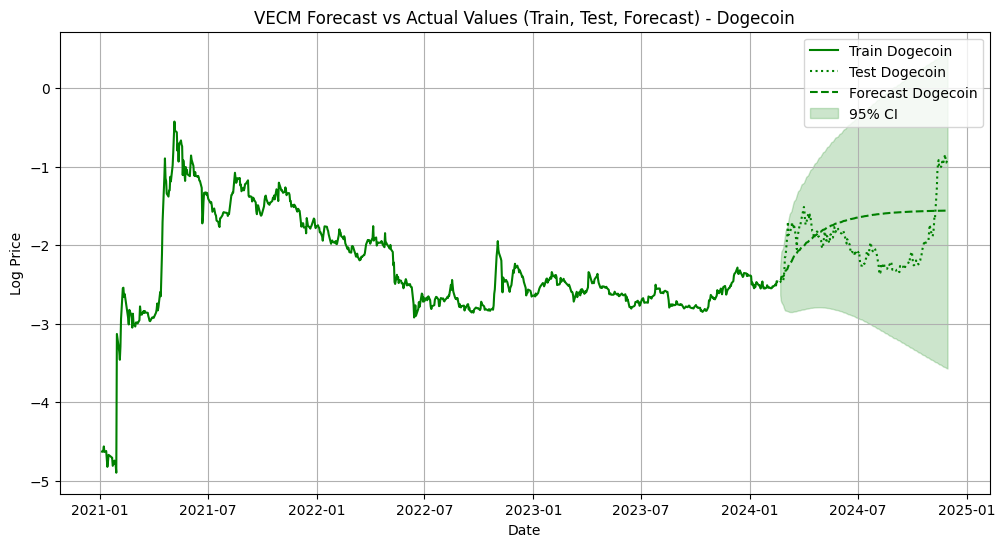

In [134]:
# Extract confidence intervals for Dogecoin
lower_dogecoin = lower_bound[:, 2]
upper_dogecoin = upper_bound[:, 2]

# Prepare the figure
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(vecm_data.index, vecm_data['open_dogecoin'], label="Train Dogecoin", color='green')

# Plot the test data
plt.plot(vecm_test.index, vecm_test['open_dogecoin'], label="Test Dogecoin", color='green', linestyle='dotted')

# Plot the forecasted values
plt.plot(vecm_test.index, forecast_values[:, 2], label="Forecast Dogecoin", color='green', linestyle='dashed')

# Add confidence intervals
plt.fill_between(vecm_test.index, lower_dogecoin, upper_dogecoin, color='green', alpha=0.2, label='95% CI')

# Add labels and title
plt.title('VECM Forecast vs Actual Values (Train, Test, Forecast) - Dogecoin')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()

# Show the grid
plt.grid()

# Display the plot
plt.show()


In [136]:
# Get the actual values from vecm_test and revert to original scale
actual_tesla = np.exp(vecm_test['open_tesla'])
actual_bitcoin = np.exp(vecm_test['open_bitcoin'])
actual_dogecoin = np.exp(vecm_test['open_dogecoin'])

# Extract the forecasts for each asset from vecm_pred
# Assuming vecm_pred[0] contains all the mean forecast values, we slice them according to the number of series.
predicted_tesla = np.exp(vecm_pred[0][:, 0].flatten()[:len(actual_tesla)])  # Revert prediction for Tesla
predicted_bitcoin = np.exp(vecm_pred[0][:, 1].flatten()[:len(actual_bitcoin)])  # Revert prediction for Bitcoin
predicted_dogecoin = np.exp(vecm_pred[0][:, 2].flatten()[:len(actual_dogecoin)])  # Revert prediction for Dogecoin

# Now calculate the squared errors for each series
squared_error_tesla = (actual_tesla - predicted_tesla) ** 2
squared_error_bitcoin = (actual_bitcoin - predicted_bitcoin) ** 2
squared_error_dogecoin = (actual_dogecoin - predicted_dogecoin) ** 2

# Calculate MSPE for each series
mspe_tesla_vecm = squared_error_tesla.mean()
mspe_bitcoin_vecm = squared_error_bitcoin.mean()
mspe_dogecoin_vecm = squared_error_dogecoin.mean()

# Print the MSPE values
print(f"MSPE for Tesla: {mspe_tesla_vecm}")
print(f"MSPE for Bitcoin: {mspe_bitcoin_vecm}")
print(f"MSPE for Dogecoin: {mspe_dogecoin_vecm}")


MSPE for Tesla: 2148.196158843887
MSPE for Bitcoin: 80894271.3017097
MSPE for Dogecoin: 0.0064526086041774644


Granger Causality

In [137]:
#test whether TESLA granger cause BITCOIN
granger_results = vecm_res.test_granger_causality(caused="open_bitcoin",causing="open_tesla", signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
0.6932,1.884,0.716,"(9, 2238)"


In [138]:
#test whether TESLA granger cause DOGECOIN
granger_results = vecm_res.test_granger_causality(caused="open_dogecoin",causing="open_tesla", signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
0.8566,1.884,0.564,"(9, 2238)"


In [139]:
#test whether BITCOIN granger cause TESLA
granger_results = vecm_res.test_granger_causality(caused="open_tesla",causing="open_bitcoin", signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
0.9729,1.884,0.460,"(9, 2238)"


In [140]:
#test whether BITCOIN granger cause DOGECOIN
granger_results = vecm_res.test_granger_causality(caused="open_dogecoin",causing="open_bitcoin", signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
3.914,1.884,0.000,"(9, 2238)"


In [141]:
#test whether DOGECOIN granger cause TESLA
granger_results = vecm_res.test_granger_causality(caused="open_tesla",causing="open_dogecoin", signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
0.6449,1.884,0.759,"(9, 2238)"


In [142]:
#test whether DOGECOIN granger cause BITCOIN
granger_results = vecm_res.test_granger_causality(caused="open_bitcoin",causing="open_dogecoin", signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
2.866,1.884,0.002,"(9, 2238)"


While there is no granger causality between cryptocurrencies and TESLA, there is a bidirectional granger causality between BITCOIN and DOGECOIN

Comparing models
--

In [143]:
x = ['tesla', 'bitcoin', 'dogecoin']

# Loop through each 'x' value and compare the MSPE values
for x in x:
    # Get the MSPE values for ARIMA and VECM for the current 'x'
    mspe_arima = globals()[f"mspe_{x}_arima"]
    mspe_vecm = globals()[f"mspe_{x}_vecm"]

    # Compare the MSPE values and print the result
    if mspe_arima < mspe_vecm:
        print(f"ARIMA model gives a lower MSPE for {x}.")
    else:
        print(f"VECM model gives a lower MSPE for {x}.")

VECM model gives a lower MSPE for tesla.
VECM model gives a lower MSPE for bitcoin.
VECM model gives a lower MSPE for dogecoin.
